# Churn Prediction Model

## Exploratory Data Analysis

### Import Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import seaborn.objects as so

from sklearn.preprocessing import LabelEncoder


%matplotlib inline
sns.set(color_codes=True)

import warnings
warnings.filterwarnings('ignore')

### Load the Data

In [2]:
client_data = pd.read_csv('./Data_sets/client_data.csv')
price_data = pd.read_csv('./Data_sets/price_data.csv')

In [3]:
client_data.head()

id                     channel_sales  \
0  24011ae4ebbe3035111d65fa7c15bc57  foosdfpfkusacimwkcsosbicdxkicaua   
1  d29c2c54acc38ff3c0614d0a653813dd                           MISSING   
2  764c75f661154dac3a6c254cd082ea7d  foosdfpfkusacimwkcsosbicdxkicaua   
3  bba03439a292a1e166f80264c16191cb  lmkebamcaaclubfxadlmueccxoimlema   
4  149d57cf92fc41cf94415803a877cb4b                           MISSING   

   cons_12m  cons_gas_12m  cons_last_month  date_activ    date_end  \
0         0         54946                0  2013-06-15  2016-06-15   
1      4660             0                0  2009-08-21  2016-08-30   
2       544             0                0  2010-04-16  2016-04-16   
3      1584             0                0  2010-03-30  2016-03-30   
4      4425             0              526  2010-01-13  2016-03-07   

  date_modif_prod date_renewal  forecast_cons_12m  ...  has_gas  imp_cons  \
0      2015-11-01   2015-06-23               0.00  ...        t      0.00   
1      2009-08-21   2015-08-31             189.95  ...        f      0.00   
2      2010-04-16   2015-04-17              47.96  ...        f      0.00   
3      2010-03-30   2015-03-31             240.04  ...        f      0.00   
4      2010-01-13   2015-03-09             445.75  ...        f     52.32   

   margin_gross_pow_ele  margin_net_pow_ele  nb_prod_act  net_margin  \
0                 25.44               25.44            2      678.99   
1                 16.38               16.38            1       18.89   
2                 28.60               28.60            1        6.60   
3                 30.22               30.22            1       25.46   
4                 44.91               44.91            1       47.98   

  num_years_antig                         origin_up  pow_max  churn  
0               3  lxidpiddsbxsbosboudacockeimpuepw   43.648      1  
1               6  kamkkxfxxuwbdslkwifmmcsiusiuosws   13.800      0  
2               6  kamkkxfxxuwbdslkwifmmcsiusiuosws   13.856      0  
3               6  kamkkxfxxuwbdslkwifmmcsiusiuosws   13.200      0  
4               6  kamkkxfxxuwbdslkwifmmcsiusiuosws   19.800      0  

[5 rows x 26 columns]

In [4]:
client_data.shape

(14606, 26)

Client data has 14606 rows and 26 columns.

In [5]:
price_data.head()

id  price_date  price_off_peak_var  \
0  038af19179925da21a25619c5a24b745  2015-01-01            0.151367   
1  038af19179925da21a25619c5a24b745  2015-02-01            0.151367   
2  038af19179925da21a25619c5a24b745  2015-03-01            0.151367   
3  038af19179925da21a25619c5a24b745  2015-04-01            0.149626   
4  038af19179925da21a25619c5a24b745  2015-05-01            0.149626   

   price_peak_var  price_mid_peak_var  price_off_peak_fix  price_peak_fix  \
0             0.0                 0.0           44.266931             0.0   
1             0.0                 0.0           44.266931             0.0   
2             0.0                 0.0           44.266931             0.0   
3             0.0                 0.0           44.266931             0.0   
4             0.0                 0.0           44.266931             0.0   

   price_mid_peak_fix  
0                 0.0  
1                 0.0  
2                 0.0  
3                 0.0  
4                 0.0

In [6]:
price_data.shape

(193002, 8)

price data has 193002 rows and 8 columns.

### Statistics

#### Data types of the columns

In [7]:
# we can use DataFrame.info method to know about the data types of the each columns

client_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14606 entries, 0 to 14605
Data columns (total 26 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              14606 non-null  object 
 1   channel_sales                   14606 non-null  object 
 2   cons_12m                        14606 non-null  int64  
 3   cons_gas_12m                    14606 non-null  int64  
 4   cons_last_month                 14606 non-null  int64  
 5   date_activ                      14606 non-null  object 
 6   date_end                        14606 non-null  object 
 7   date_modif_prod                 14606 non-null  object 
 8   date_renewal                    14606 non-null  object 
 9   forecast_cons_12m               14606 non-null  float64
 10  forecast_cons_year              14606 non-null  int64  
 11  forecast_discount_energy        14606 non-null  float64
 12  forecast_meter_rent_12m         

In [8]:
price_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 193002 entries, 0 to 193001
Data columns (total 8 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   id                  193002 non-null  object 
 1   price_date          193002 non-null  object 
 2   price_off_peak_var  193002 non-null  float64
 3   price_peak_var      193002 non-null  float64
 4   price_mid_peak_var  193002 non-null  float64
 5   price_off_peak_fix  193002 non-null  float64
 6   price_peak_fix      193002 non-null  float64
 7   price_mid_peak_fix  193002 non-null  float64
dtypes: float64(6), object(2)
memory usage: 11.8+ MB


#### Descriptive Statistics

DataFrame.describe() method gives the idea of distribution of the data with in the columns,
but only for the columns with numeric values

In [9]:
client_data.describe()

cons_12m  cons_gas_12m  cons_last_month  forecast_cons_12m  \
count  1.460600e+04  1.460600e+04     14606.000000       14606.000000   
mean   1.592203e+05  2.809238e+04     16090.269752        1868.614880   
std    5.734653e+05  1.629731e+05     64364.196422        2387.571531   
min    0.000000e+00  0.000000e+00         0.000000           0.000000   
25%    5.674750e+03  0.000000e+00         0.000000         494.995000   
50%    1.411550e+04  0.000000e+00       792.500000        1112.875000   
75%    4.076375e+04  0.000000e+00      3383.000000        2401.790000   
max    6.207104e+06  4.154590e+06    771203.000000       82902.830000   

       forecast_cons_year  forecast_discount_energy  forecast_meter_rent_12m  \
count        14606.000000              14606.000000             14606.000000   
mean          1399.762906                  0.966726                63.086871   
std           3247.786255                  5.108289                66.165783   
min              0.000000                  0.000000                 0.000000   
25%              0.000000                  0.000000                16.180000   
50%            314.000000                  0.000000                18.795000   
75%           1745.750000                  0.000000               131.030000   
max         175375.000000                 30.000000               599.310000   

       forecast_price_energy_off_peak  forecast_price_energy_peak  \
count                    14606.000000                14606.000000   
mean                         0.137283                    0.050491   
std                          0.024623                    0.049037   
min                          0.000000                    0.000000   
25%                          0.116340                    0.000000   
50%                          0.143166                    0.084138   
75%                          0.146348                    0.098837   
max                          0.273963                    0.195975   

       forecast_price_pow_off_peak      imp_cons  margin_gross_pow_ele  \
count                 14606.000000  14606.000000          14606.000000   
mean                     43.130056    152.786896             24.565121   
std                       4.485988    341.369366             20.231172   
min                       0.000000      0.000000              0.000000   
25%                      40.606701      0.000000             14.280000   
50%                      44.311378     37.395000             21.640000   
75%                      44.311378    193.980000             29.880000   
max                      59.266378  15042.790000            374.640000   

       margin_net_pow_ele   nb_prod_act    net_margin  num_years_antig  \
count        14606.000000  14606.000000  14606.000000     14606.000000   
mean            24.562517      1.292346    189.264522         4.997809   
std             20.230280      0.709774    311.798130         1.611749   
min              0.000000      1.000000      0.000000         1.000000   
25%             14.280000      1.000000     50.712500         4.000000   
50%             21.640000      1.000000    112.530000         5.000000   
75%             29.880000      1.000000    243.097500         6.000000   
max            374.640000     32.000000  24570.650000        13.000000   

            pow_max         churn  
count  14606.000000  14606.000000  
mean      18.135136      0.097152  
std       13.534743      0.296175  
min        3.300000      0.000000  
25%       12.500000      0.000000  
50%       13.856000      0.000000  
75%       19.172500      0.000000  
max      320.000000      1.000000

maximum value in cons_last_month column is 771203 and 75% value in this column is 3383,
which means only 25% data is above 3383 and their is huge diffrence between 75% value and the maximum value. this indicates the how wide the value is distributed. and the same for the forecast_cons__year column.


In [10]:
price_data.describe()

price_off_peak_var  price_peak_var  price_mid_peak_var  \
count       193002.000000   193002.000000       193002.000000   
mean             0.141027        0.054630            0.030496   
std              0.025032        0.049924            0.036298   
min              0.000000        0.000000            0.000000   
25%              0.125976        0.000000            0.000000   
50%              0.146033        0.085483            0.000000   
75%              0.151635        0.101673            0.072558   
max              0.280700        0.229788            0.114102   

       price_off_peak_fix  price_peak_fix  price_mid_peak_fix  
count       193002.000000   193002.000000       193002.000000  
mean            43.334477       10.622875            6.409984  
std              5.410297       12.841895            7.773592  
min              0.000000        0.000000            0.000000  
25%             40.728885        0.000000            0.000000  
50%             44.266930        0.000000            0.000000  
75%             44.444710       24.339581           16.226389  
max             59.444710       36.490692           17.458221

### Exploratory Data Analysis (EDA)

#### Find the Correlation 

In [11]:
client_data.corr()

cons_12m  cons_gas_12m  cons_last_month  \
cons_12m                        1.000000      0.488474         0.968212   
cons_gas_12m                    0.488474      1.000000         0.507007   
cons_last_month                 0.968212      0.507007         1.000000   
forecast_cons_12m               0.193947      0.084359         0.177773   
forecast_cons_year              0.167093      0.080934         0.193574   
forecast_discount_energy       -0.043282     -0.012595        -0.040874   
forecast_meter_rent_12m         0.065268      0.041393         0.057476   
forecast_price_energy_off_peak -0.007748     -0.017684        -0.005187   
forecast_price_energy_peak      0.145908      0.074002         0.136802   
forecast_price_pow_off_peak    -0.026566     -0.020558        -0.023017   
imp_cons                        0.159711      0.077846         0.187034   
margin_gross_pow_ele           -0.011926      0.006868        -0.011498   
margin_net_pow_ele             -0.011905      0.006852        -0.011477   
nb_prod_act                     0.154251      0.239387         0.169099   
net_margin                      0.133614      0.070867         0.121835   
num_years_antig                -0.003565     -0.013815        -0.003677   
pow_max                         0.082889      0.054317         0.074529   
churn                          -0.045968     -0.037957        -0.045284   

                                forecast_cons_12m  forecast_cons_year  \
cons_12m                                 0.193947            0.167093   
cons_gas_12m                             0.084359            0.080934   
cons_last_month                          0.177773            0.193574   
forecast_cons_12m                        1.000000            0.647727   
forecast_cons_year                       0.647727            1.000000   
forecast_discount_energy                 0.058435            0.008518   
forecast_meter_rent_12m                  0.305627            0.276009   
forecast_price_energy_off_peak          -0.135646           -0.158012   
forecast_price_energy_peak               0.254056            0.251005   
forecast_price_pow_off_peak             -0.018477           -0.044190   
imp_cons                                 0.634600            0.969395   
margin_gross_pow_ele                    -0.023220           -0.010759   
margin_net_pow_ele                      -0.023231           -0.010727   
nb_prod_act                              0.055915            0.040426   
net_margin                               0.768537            0.464928   
num_years_antig                          0.021283            0.048248   
pow_max                                  0.393946            0.309647   
churn                                    0.012949           -0.002558   

                                forecast_discount_energy  \
cons_12m                                       -0.043282   
cons_gas_12m                                   -0.012595   
cons_last_month                                -0.040874   
forecast_cons_12m                               0.058435   
forecast_cons_year                              0.008518   
forecast_discount_energy                        1.000000   
forecast_meter_rent_12m                        -0.008388   
forecast_price_energy_off_peak                  0.353735   
forecast_price_energy_peak                      0.059318   
forecast_price_pow_off_peak                     0.048024   
imp_cons                                        0.037939   
margin_gross_pow_ele                            0.241142   
margin_net_pow_ele                              0.240421   
nb_prod_act                                     0.106812   
net_margin                                      0.079784   
num_years_antig                                -0.070697   
pow_max                                        -0.005032   
churn                                           0.017026   

                                forecast_meter_rent_12m  \
cons_12m          

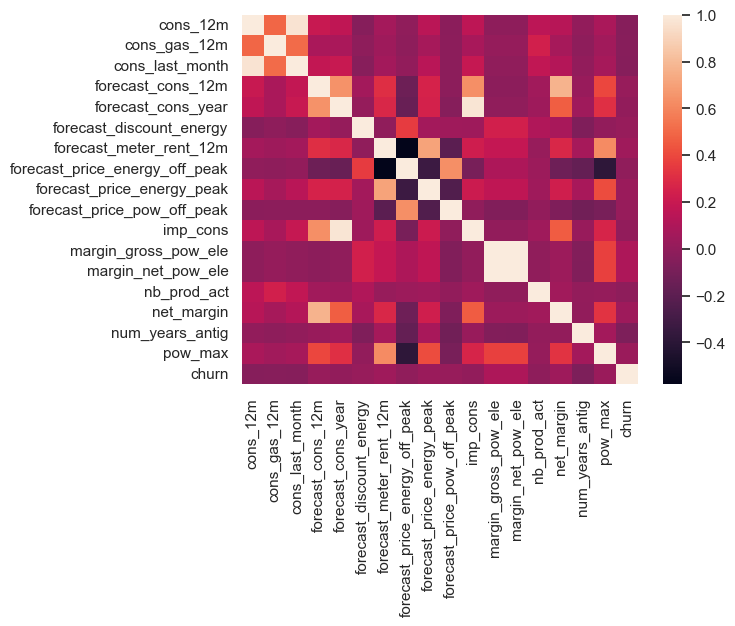

In [12]:
#plotting the correlation matrix
ax = sns.heatmap(client_data.corr(), annot=False)

From above correlation  matrix we can see that how some columns are correlated to each other like 
margin_gross_pow_ele and margin_net_pow_ele are highly correlated. imp_cons and forecast_cons_year are also highly correlated.

the columns pow_max and forecast_price_energy_off_peak are highly negativ correlated.

we will see these data later.

In [13]:
#function for the viz.

def bar_plot(data, column, title, xlabel, ylabel):
    
    #preprocess the data
    new_data = data[[column]].value_counts().reset_index(name = 'count')
    new_data['per'] = new_data['count']/new_data['count'].sum()*100
    
    #sort the data in descending order
    order_by = new_data.sort_values(by=['per'], ascending = False)[column]
    
    #plotting the viz
    plt.figure(figsize = (8,5))
    ax = sns.barplot(new_data, x = column, y = 'per' , order = order_by)
    
    #adding the text on viz
    for p in ax.patches:
        x = p.get_x() + p.get_width()/2
        y = p.get_height() + 1
        ax.annotate(text = '{:.2f}%'.format(p.get_height()), xy=(x, y), ha='center', size = 9, color = 'black')
    ax.margins(y = 0.13)
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.show()

The below viz. shows that 9.7% of total customers/companies have churned or they take service from other power supplier. 

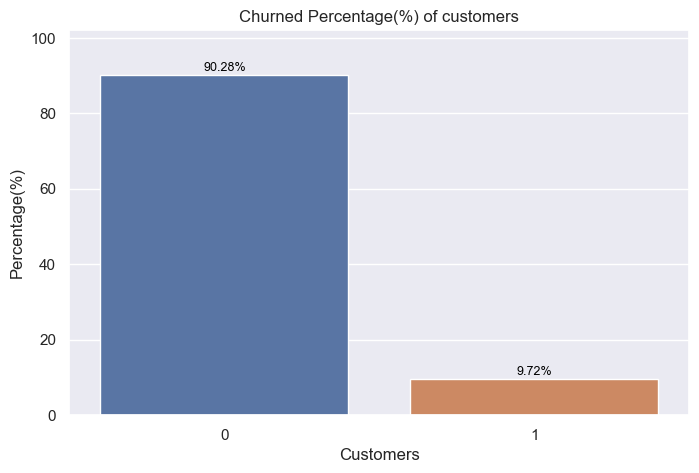

In [14]:
#lets find the churned percentage of the customers.
bar_plot(data = client_data, column = 'churn',title = "Churned Percentage(%) of customers",
         xlabel = "Customers", ylabel = "Percentage(%)")

In [15]:
#lets find the channel_sales distribution
client_data['channel_sales'].value_counts()

foosdfpfkusacimwkcsosbicdxkicaua    6754
MISSING                             3725
lmkebamcaaclubfxadlmueccxoimlema    1843
usilxuppasemubllopkaafesmlibmsdf    1375
ewpakwlliwisiwduibdlfmalxowmwpci     893
sddiedcslfslkckwlfkdpoeeailfpeds      11
epumfxlbckeskwekxbiuasklxalciiuu       3
fixdbufsefwooaasfcxdxadsiekoceaa       2
Name: channel_sales, dtype: int64

In [16]:
#but befor that we need to conver the value to numeric to make it understandable
#we will do it by LabelEncoding

le = LabelEncoder()
client_data['channel_sales'] = le.fit_transform(client_data['channel_sales'])
client_data['channel_sales'].value_counts()

4    6754
0    3725
5    1843
7    1375
2     893
6      11
1       3
3       2
Name: channel_sales, dtype: int64

From the below channel_sales viz, the channel 4 (foosdfpfkusacimwkcsosbicdxkicaua) is used by most of the customers. while cahnnel 3(fixdbufsefwooaasfcxdxadsiekoceaa) is used by least of the customers.

<b>Note</b>  i dont actually understnad channel 0 (MISSING) is missing value or its the code, 

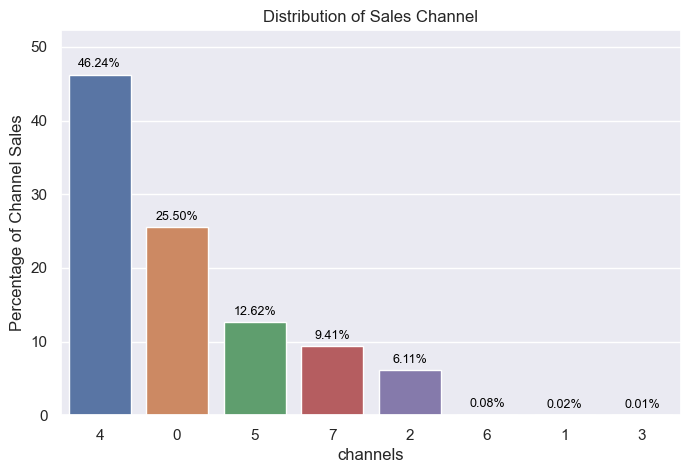

In [17]:
#lets find the cahnnel which is used by customers to get electicity/gas
bar_plot(client_data, 'channel_sales', title = "Distribution of Sales Channel", 
        xlabel = 'channels', ylabel = 'Percentage of Channel Sales')

Let's find out the churned Percentage of customers in each sales channel.

In [18]:
def stacked_bar_chart(data, column1, column2):
    #preprocess the data
    data = data.groupby([column1,column2]).value_counts().reset_index(name = 'count')
    #making pivot table
    data = data.pivot(index = column1, columns = column2, values = 'count').fillna(0)
    data = data.div(data.sum(axis=1), axis = 0)
    #sorting the data in descending order
    data = data.sort_values(by = 1, ascending = False)
    #return data

    #plotting the data
    ax = data.plot(kind = 'bar', stacked = True, figsize = (8,5))

    plt.legend(loc = "upper right", ncol = 2)
    
    #adding the text
    for p in ax.patches:
        percentage = '{:.1f}%'.format(p.get_height()*100)
        if percentage!='0.0%':
            x = p.get_x() + p.get_width()/2
            y = 1 - p.get_height()/1.8
            ax.annotate(text=percentage, xy=(x, y), ha='center', color = 'black', size = 8)
    ax.margins(y=0.1)

The churned customers are from sales channel 4,7,2,0 and 5 ranging from 12.1% to 5.6%. the channel 1,3 and 6 are least popular sales channel but no churned customers

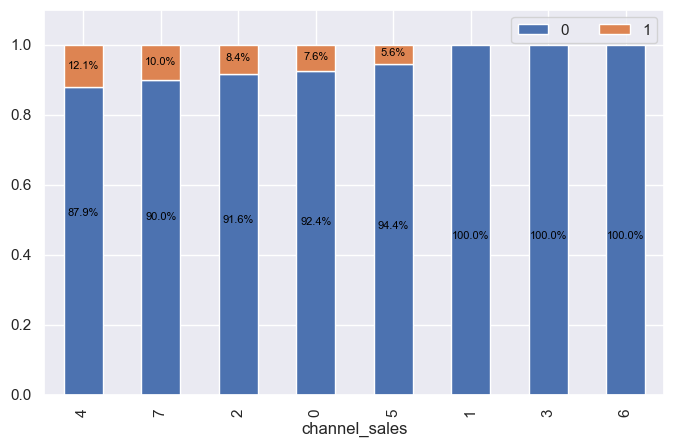

In [19]:
stc_data = client_data[['channel_sales', 'churn']]

stacked_bar_chart(stc_data, 'channel_sales', 'churn')

Let's explore the clients that have subscribed for gas also

Only 18.5% of customers are also a client of Gas

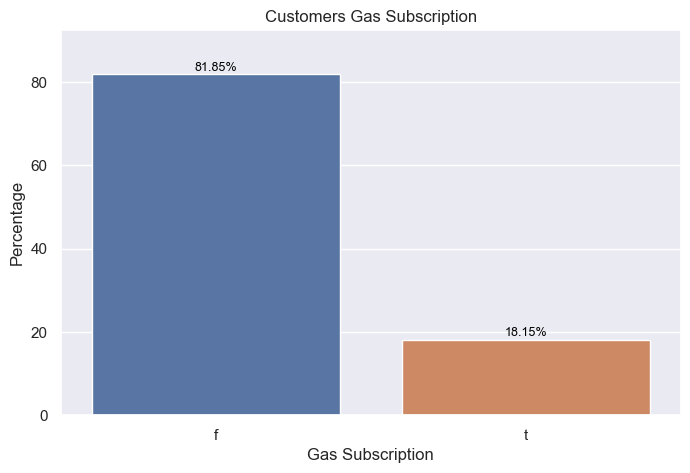

In [20]:
bar_plot(client_data, 'has_gas', title = "Customers Gas Subscription", 
        xlabel = 'Gas Subscription', ylabel = 'Percentage')

Lets check the churned ratio of customers having gas subscription.

The churned ratio of client subscribed to both ealectricity and gas are less than the clients subscribed to only electricity.

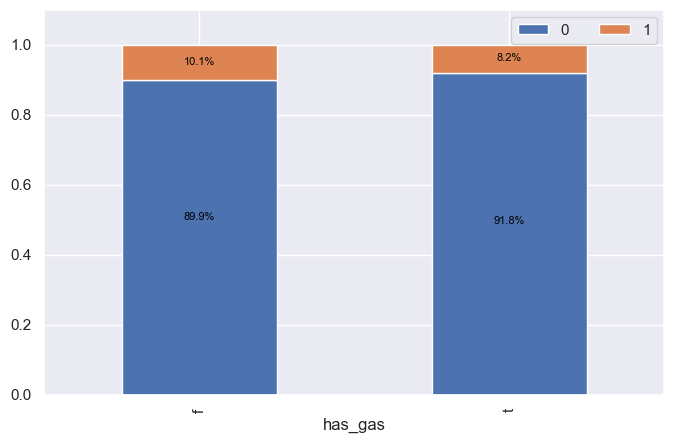

In [21]:
stc_data = client_data[['has_gas', 'churn']]
stacked_bar_chart(stc_data, 'has_gas', 'churn')

 Let's check for the electricity campaign the customer first subscribed.

In [22]:
client_data['origin_up'].value_counts()

lxidpiddsbxsbosboudacockeimpuepw    7097
kamkkxfxxuwbdslkwifmmcsiusiuosws    4294
ldkssxwpmemidmecebumciepifcamkci    3148
MISSING                               64
usapbepcfoloekilkwsdiboslwaxobdp       2
ewxeelcelemmiwuafmddpobolfuxioce       1
Name: origin_up, dtype: int64

In [23]:
#preprocess the data
client_data['origin_up'] = le.fit_transform(client_data['origin_up'])
client_data['origin_up'].value_counts()

4    7097
2    4294
3    3148
0      64
5       2
1       1
Name: origin_up, dtype: int64

Campaign 4 has the highest subscribed customers followed by 2 and 3. while campaign 1 has the least subscribed customers followed by 5 and 0.

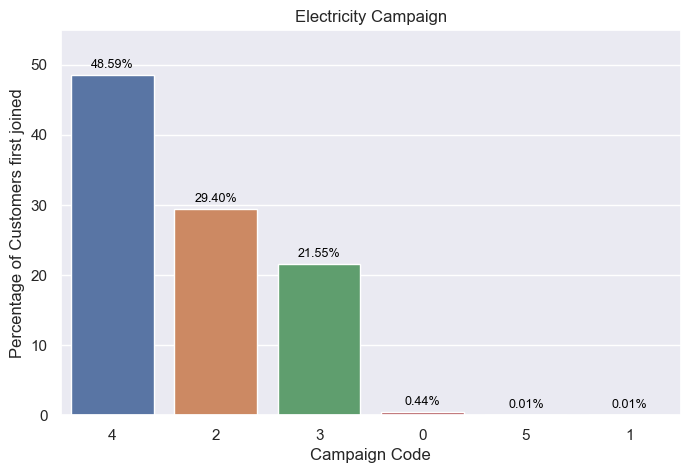

In [24]:
bar_plot(client_data, 'origin_up', title = "Electricity Campaign", 
        xlabel = 'Campaign Code', ylabel = 'Percentage of Customers first joined')

The Range of churned ratio of customers subscribed to diffrent electricity campaign vary from 6% to 12.6%.

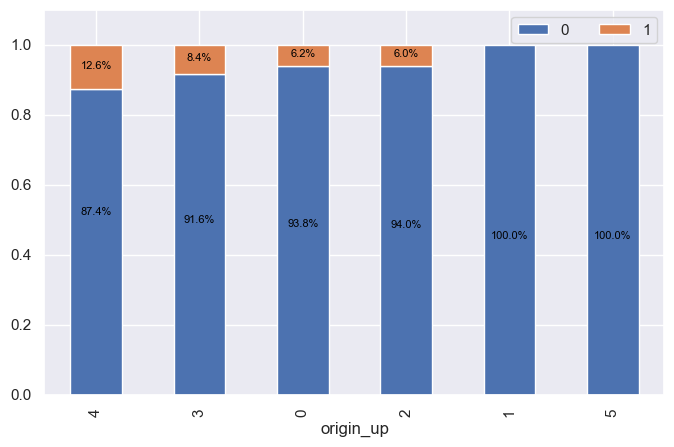

In [25]:
stc_data = client_data[['origin_up', 'churn']]
stacked_bar_chart(stc_data, 'origin_up', 'churn')

Lets Find out the antiquity of the clients

In [26]:
client_data['num_years_antig'].value_counts()

6     4769
4     3982
3     2433
5     2317
7      509
11     185
12     110
8      103
9       92
10      81
13      13
2       11
1        1
Name: num_years_antig, dtype: int64

Antiquity of Most of the customers are lies between 3 to 6 years.

The new Customers are more likely to be churned than the older customers.

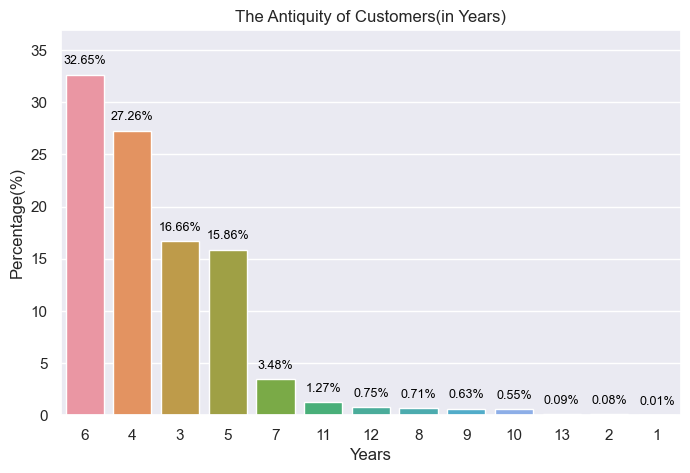

In [27]:
bar_plot(client_data, 'num_years_antig', title = "The Antiquity of Customers(in Years)", 
        xlabel = 'Years', ylabel = 'Percentage(%)')

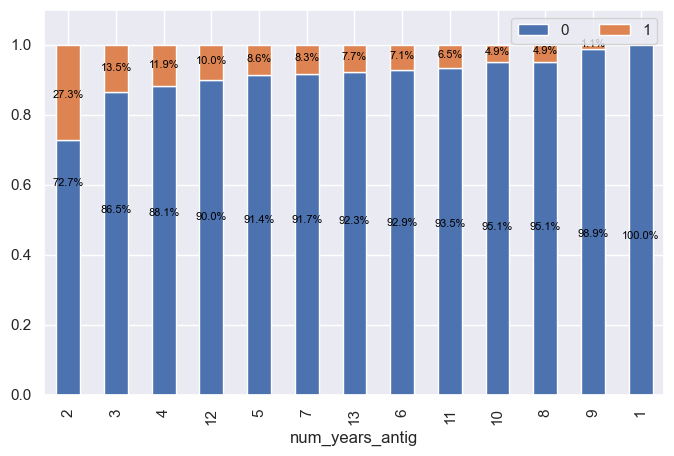

In [28]:
stc_data = client_data[['num_years_antig', 'churn']]
stacked_bar_chart(stc_data, 'num_years_antig', 'churn')

Lets check the number of active Products and services of the customers

In [29]:
client_data['nb_prod_act'].value_counts()

1     11431
2      2445
3       523
4       150
5        31
9        11
6         8
8         4
10        2
32        1
Name: nb_prod_act, dtype: int64

Most of the customers have only one active product or services

The Customers having more than 5 active product and services are more likely to be continue.

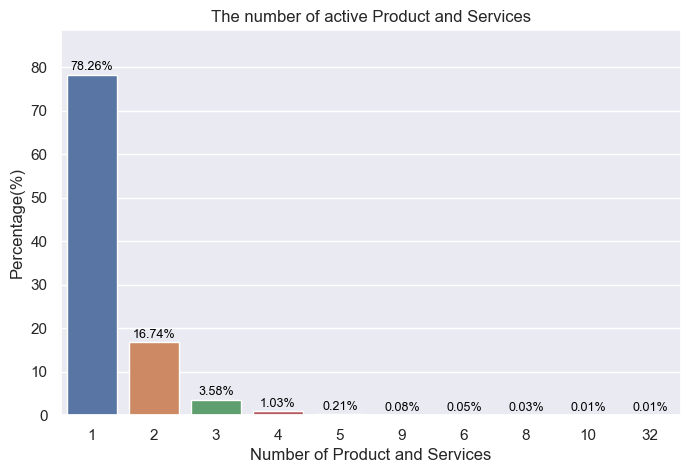

In [30]:
bar_plot(client_data, 'nb_prod_act', title = "The number of active Product and Services", 
        xlabel = 'Number of Product and Services', ylabel = 'Percentage(%)')

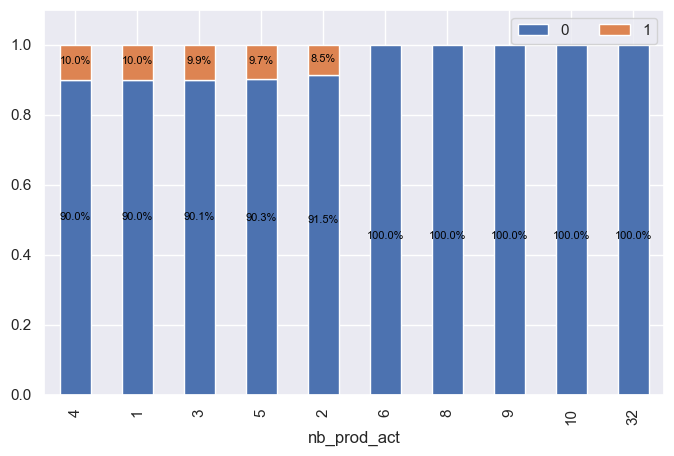

In [31]:
stc_data = client_data[['nb_prod_act', 'churn']]
stacked_bar_chart(stc_data, 'nb_prod_act', 'churn')

Now lets plot the distribution of continues numeric data

In [32]:
# function for histogram
def plot_histogram(data, column, figsize=(20,6), bins=100, if_churn=True):
    fig = plt.figure(figsize=figsize)
    if if_churn:
        ax = sns.histplot(data, x = column, bins = bins, hue = 'churn', kde = True)
    else:
        ax = sns.histplot(data, x = column, bins = bins, kde = True)

Lets plot the consumption data of the customers.

Maximum data are clustered around one point and some point are like high rise building. that may act as an outlier.  

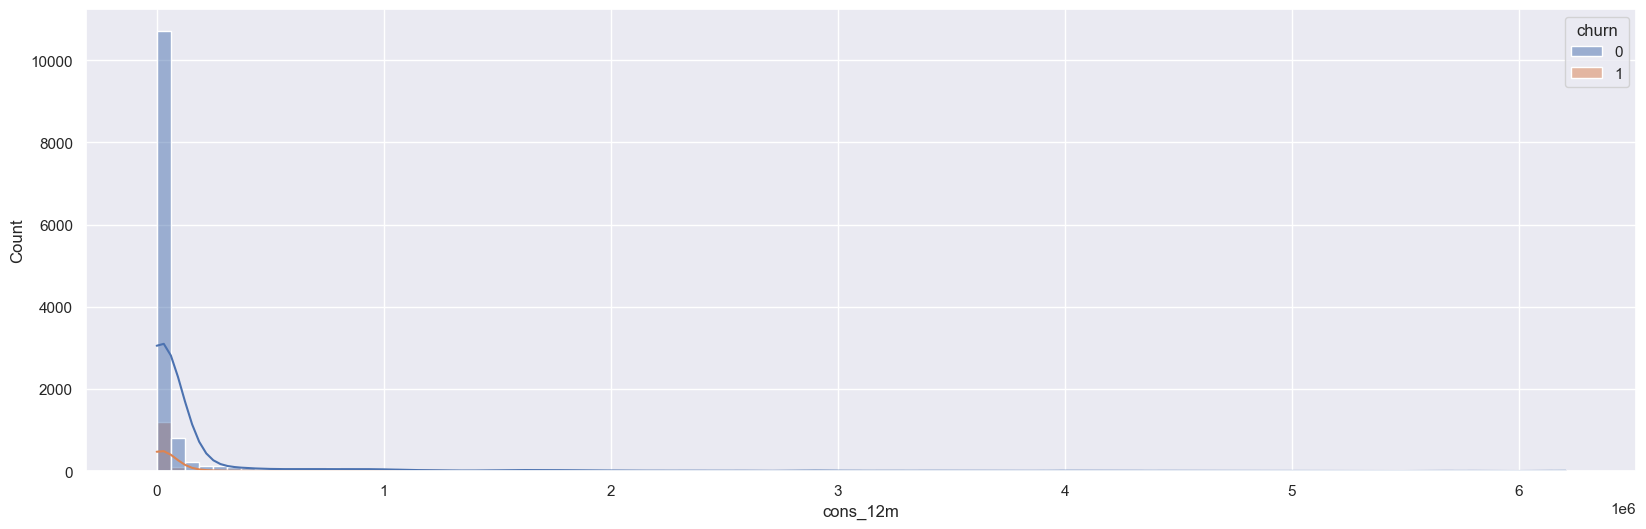

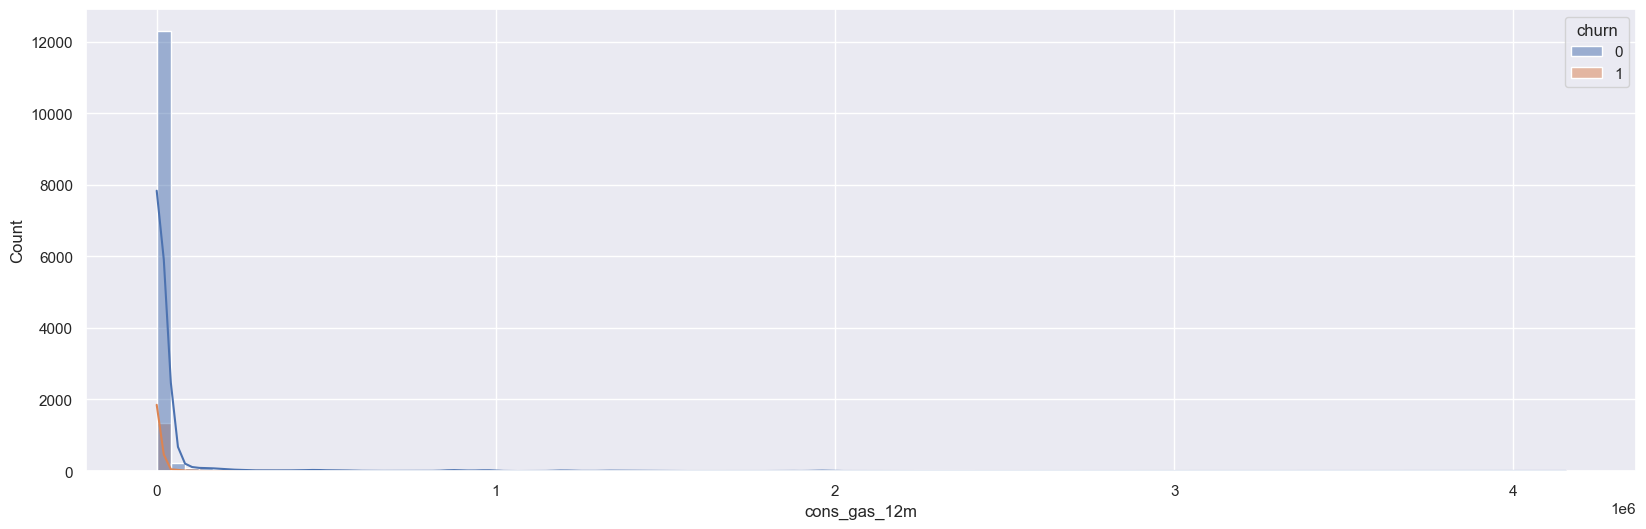

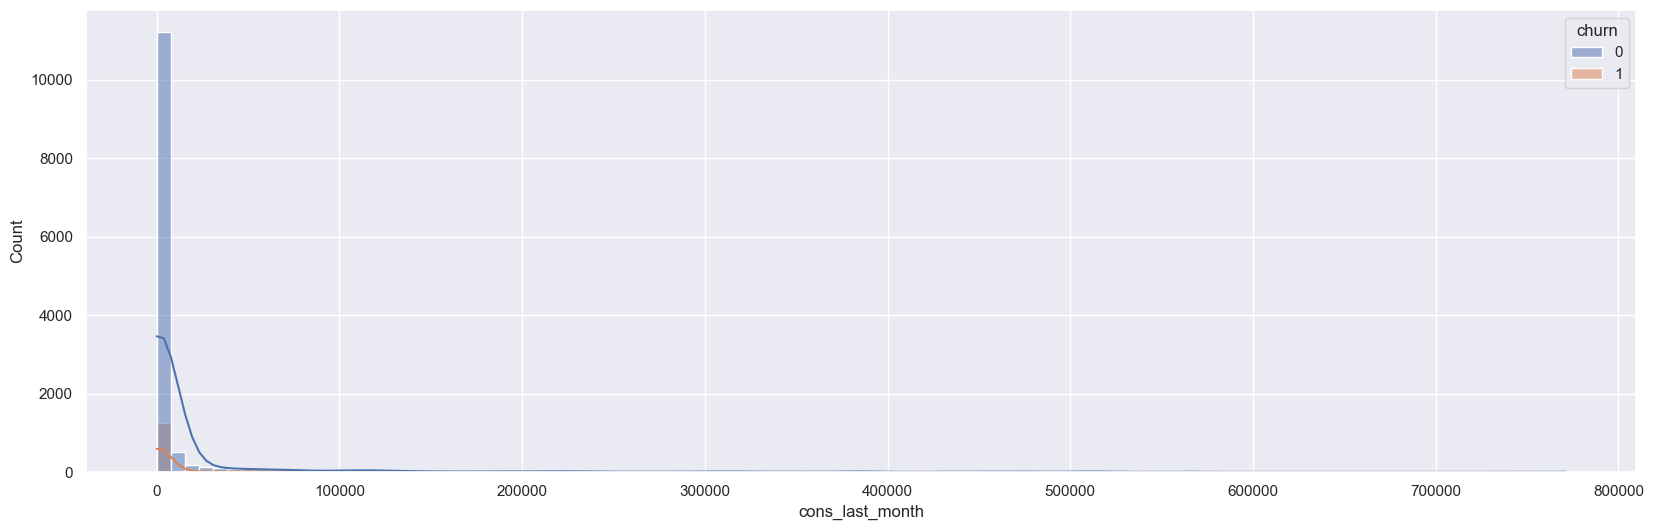

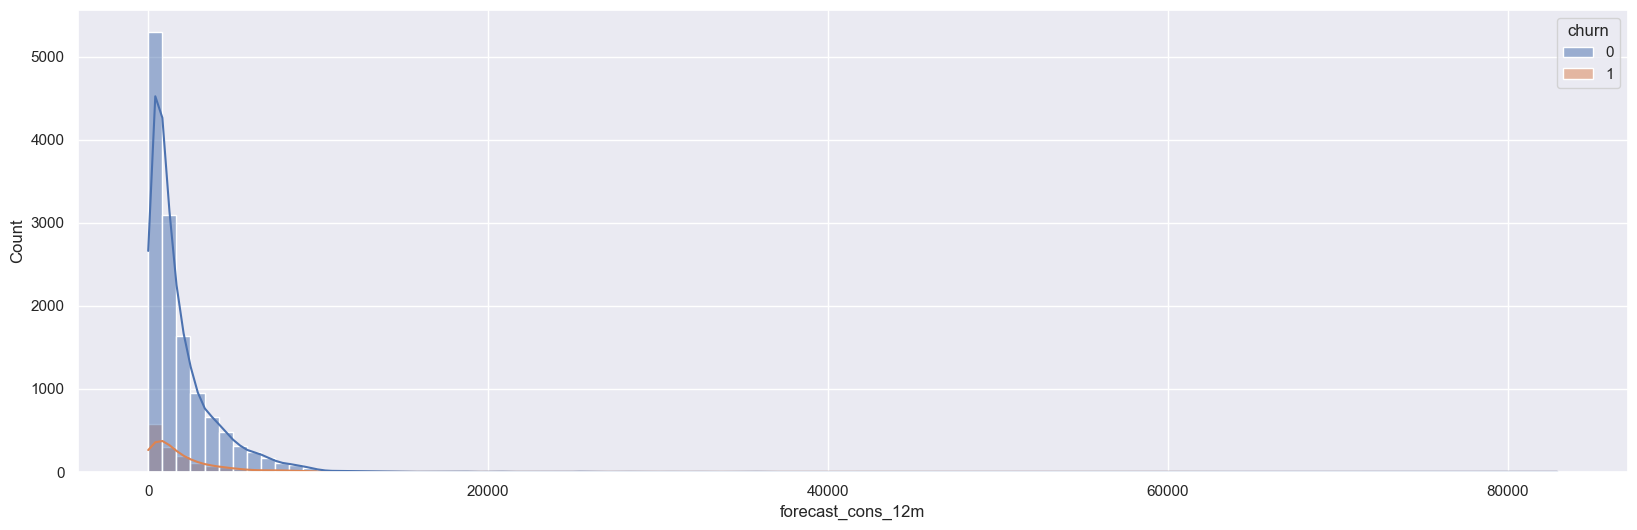

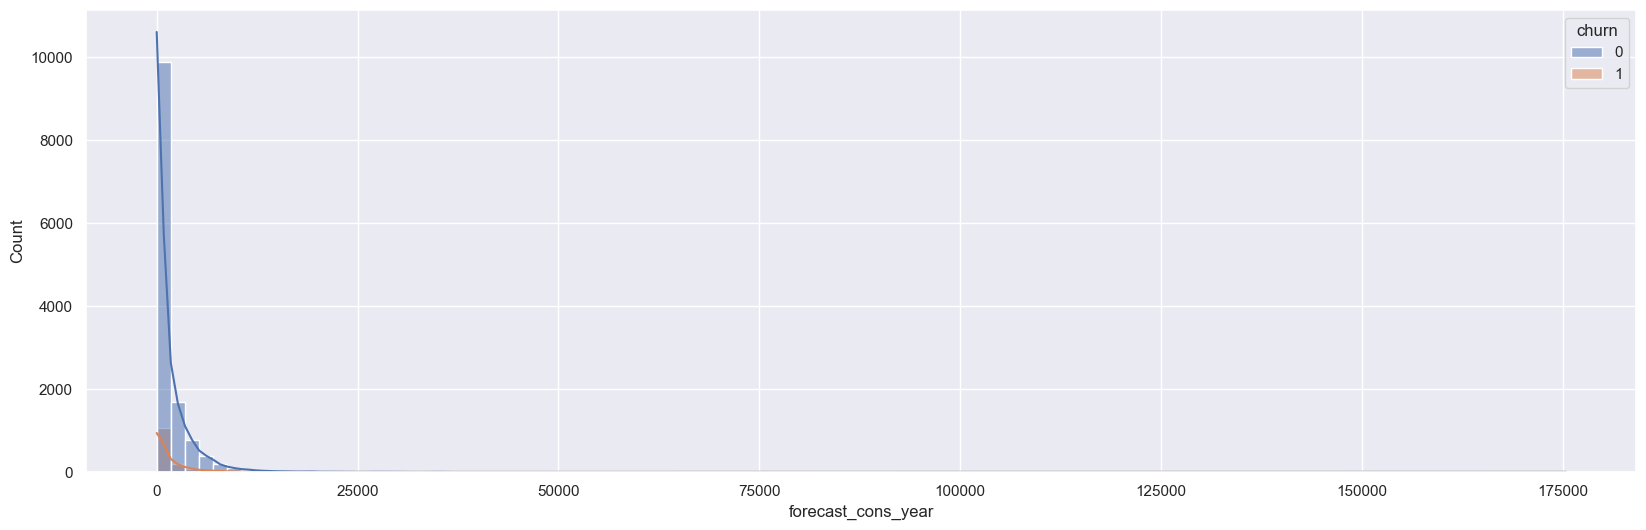

In [33]:
for consumption in ['cons_12m', 'cons_gas_12m', 'cons_last_month','forecast_cons_12m', 'forecast_cons_year']:
    plot_histogram(client_data, consumption)

Lets check the Bill and discount related data.

These all are skewed distribution and may affect the performance of the model.

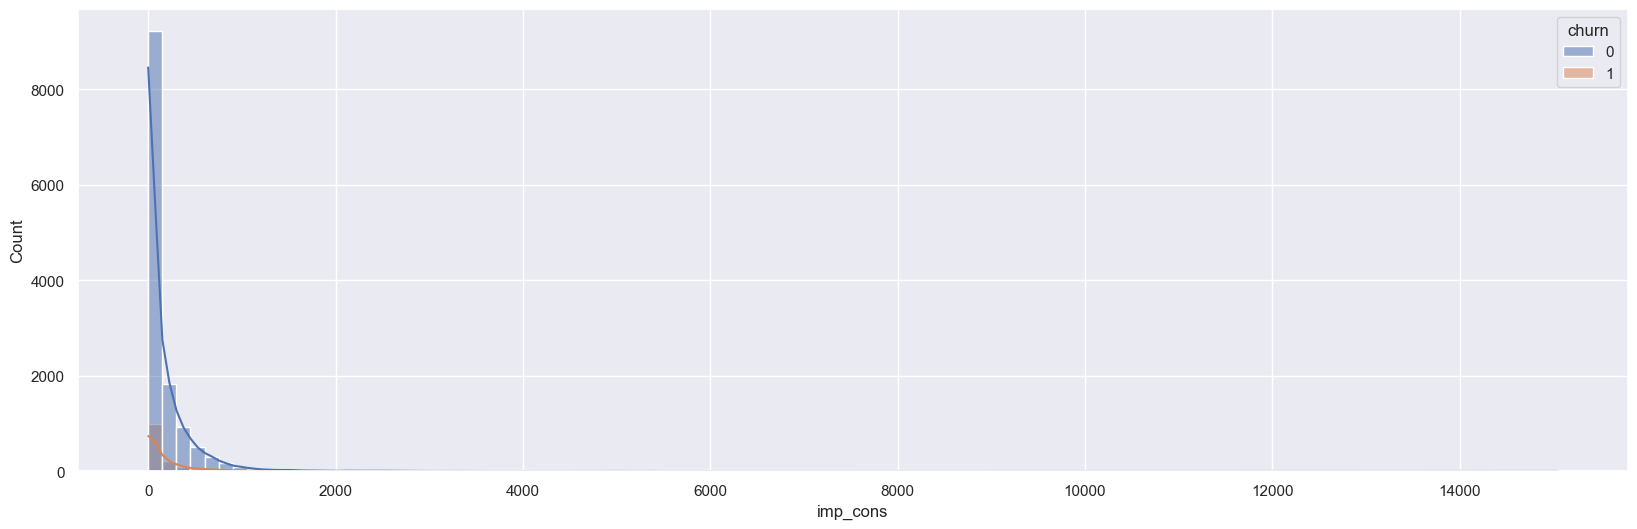

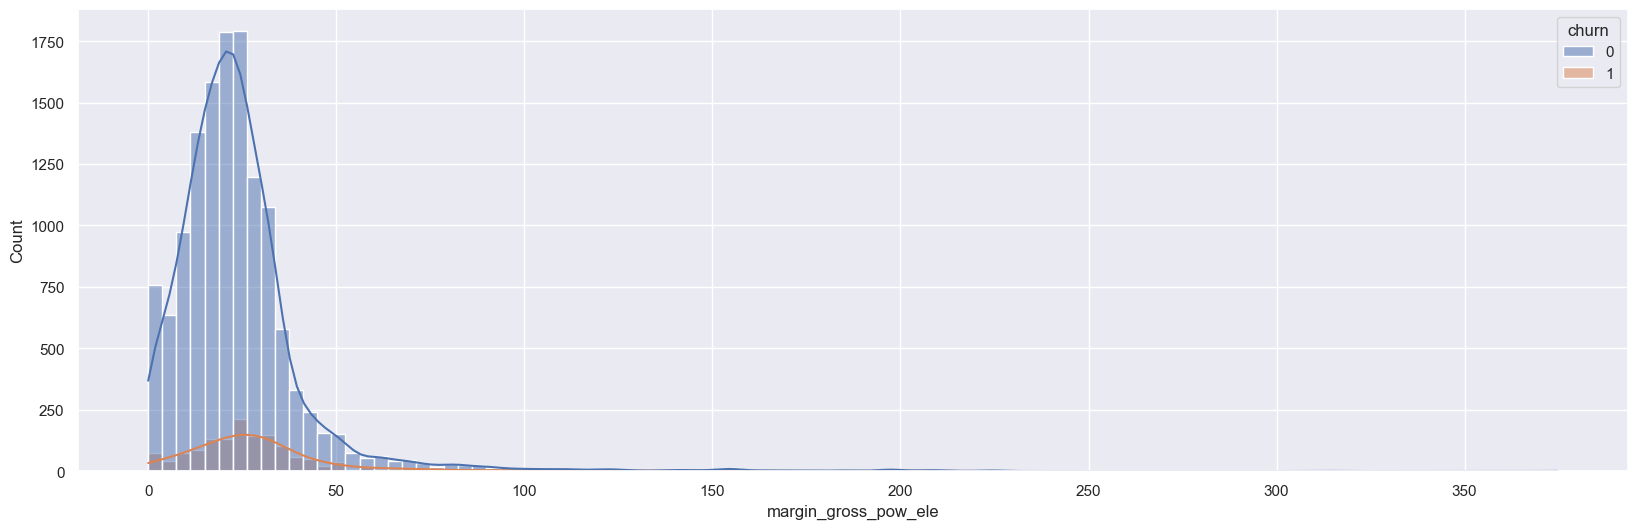

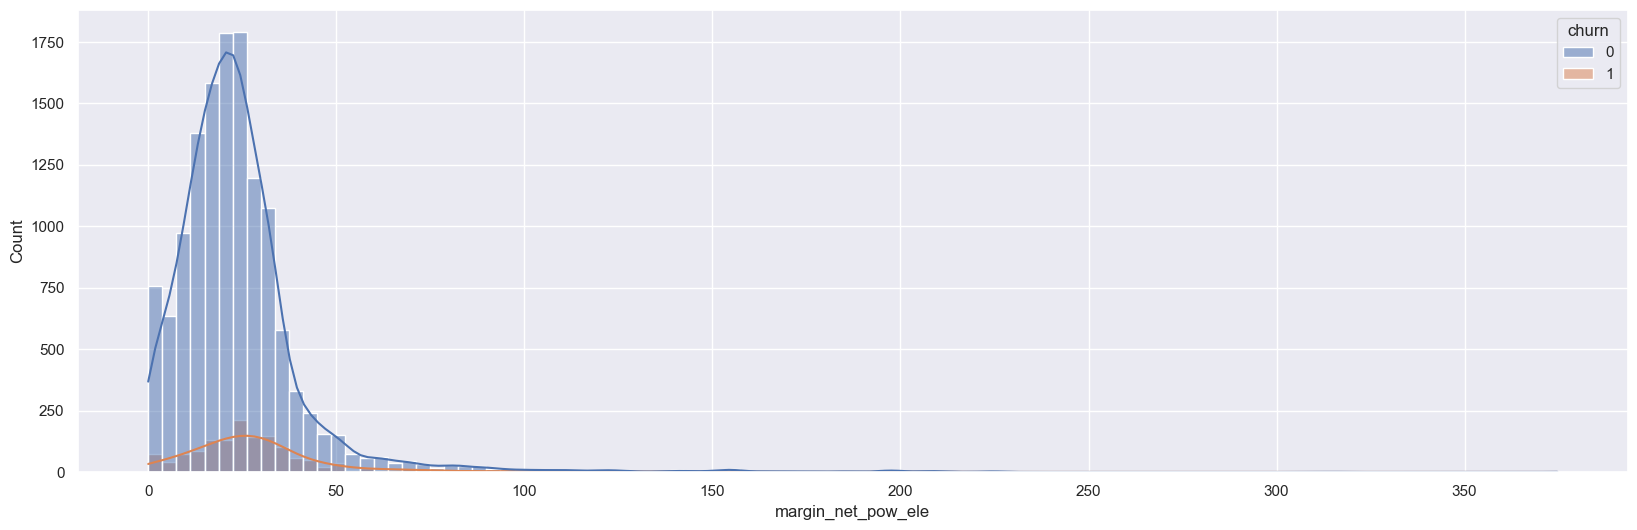

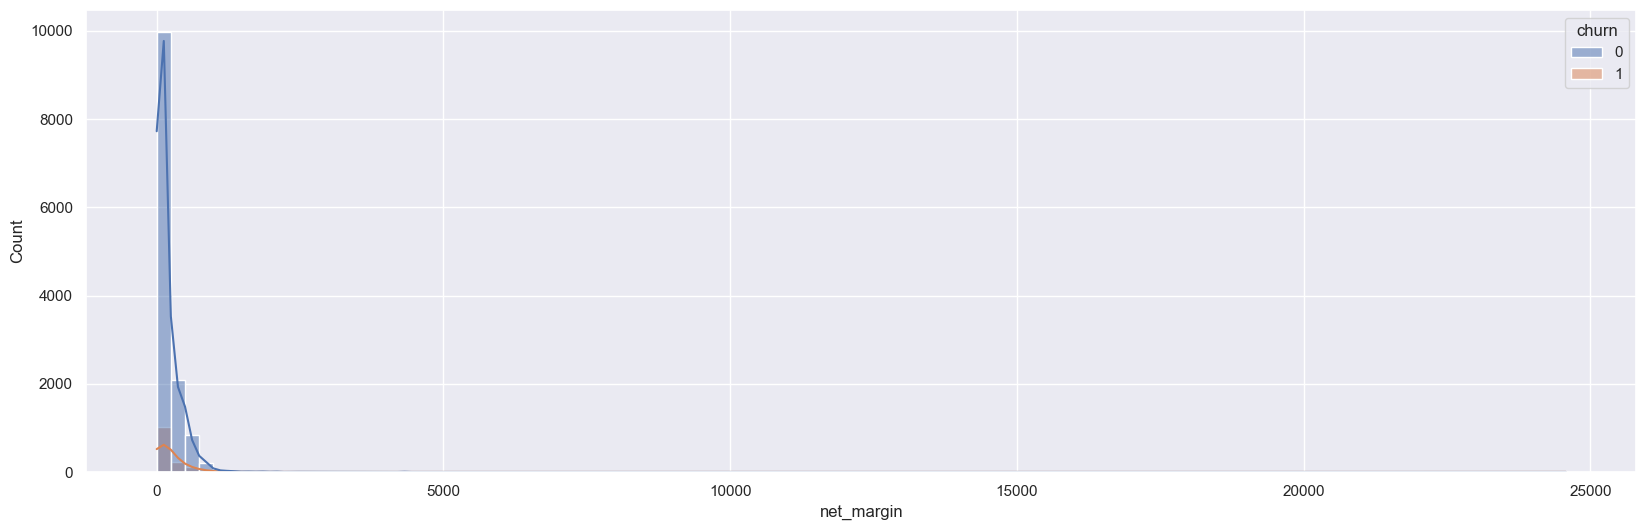

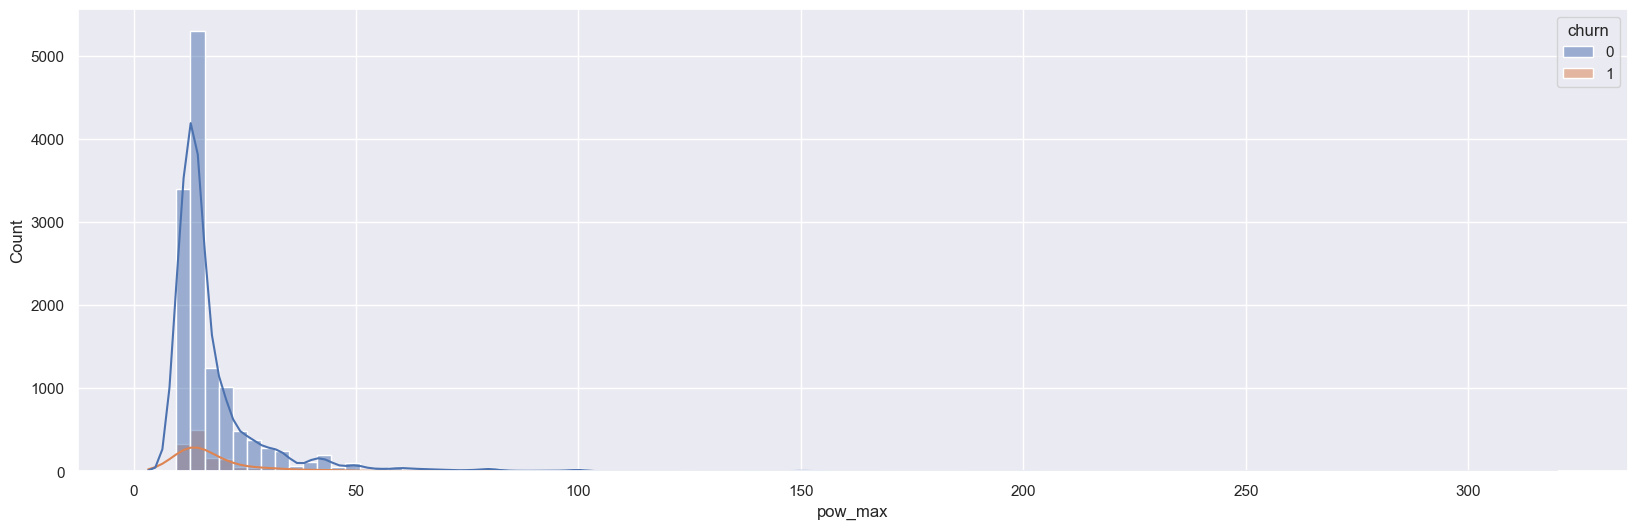

In [34]:
for bill in ['imp_cons', 'margin_gross_pow_ele', 'margin_net_pow_ele','net_margin','pow_max',]:
    plot_histogram(client_data, bill)

Now Lets Examine the Price_Data

In [35]:
price_data.head(3)

id  price_date  price_off_peak_var  \
0  038af19179925da21a25619c5a24b745  2015-01-01            0.151367   
1  038af19179925da21a25619c5a24b745  2015-02-01            0.151367   
2  038af19179925da21a25619c5a24b745  2015-03-01            0.151367   

   price_peak_var  price_mid_peak_var  price_off_peak_fix  price_peak_fix  \
0             0.0                 0.0           44.266931             0.0   
1             0.0                 0.0           44.266931             0.0   
2             0.0                 0.0           44.266931             0.0   

   price_mid_peak_fix  
0                 0.0  
1                 0.0  
2                 0.0

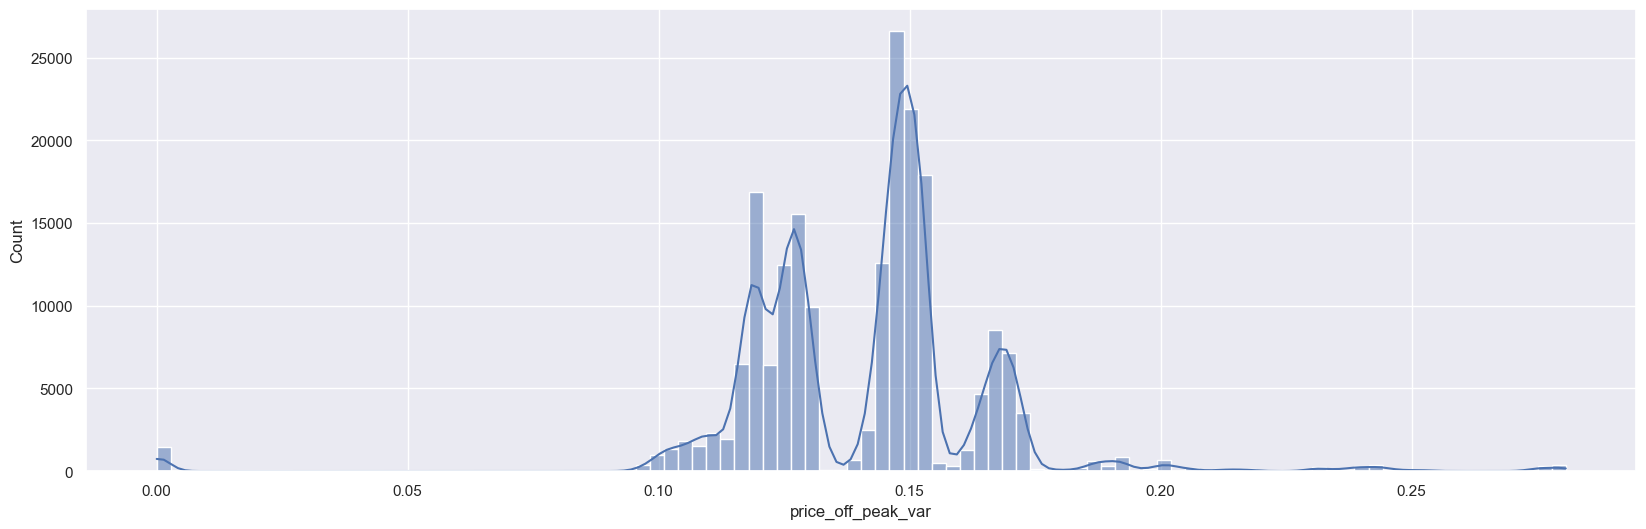

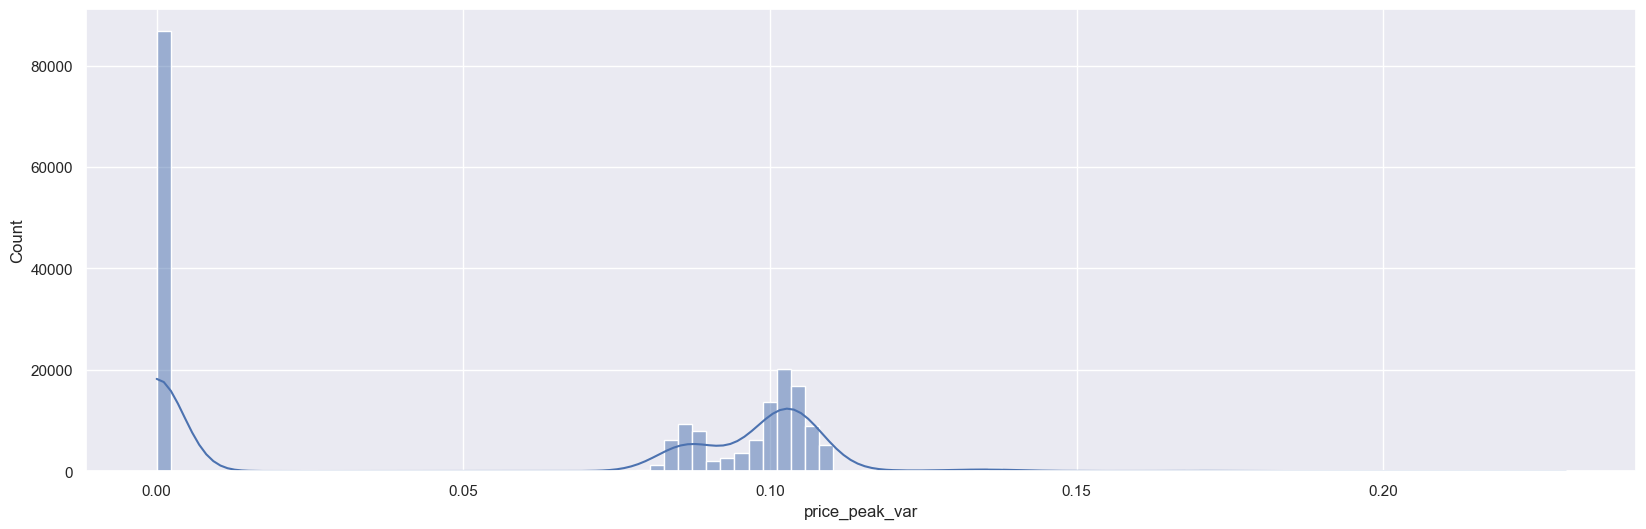

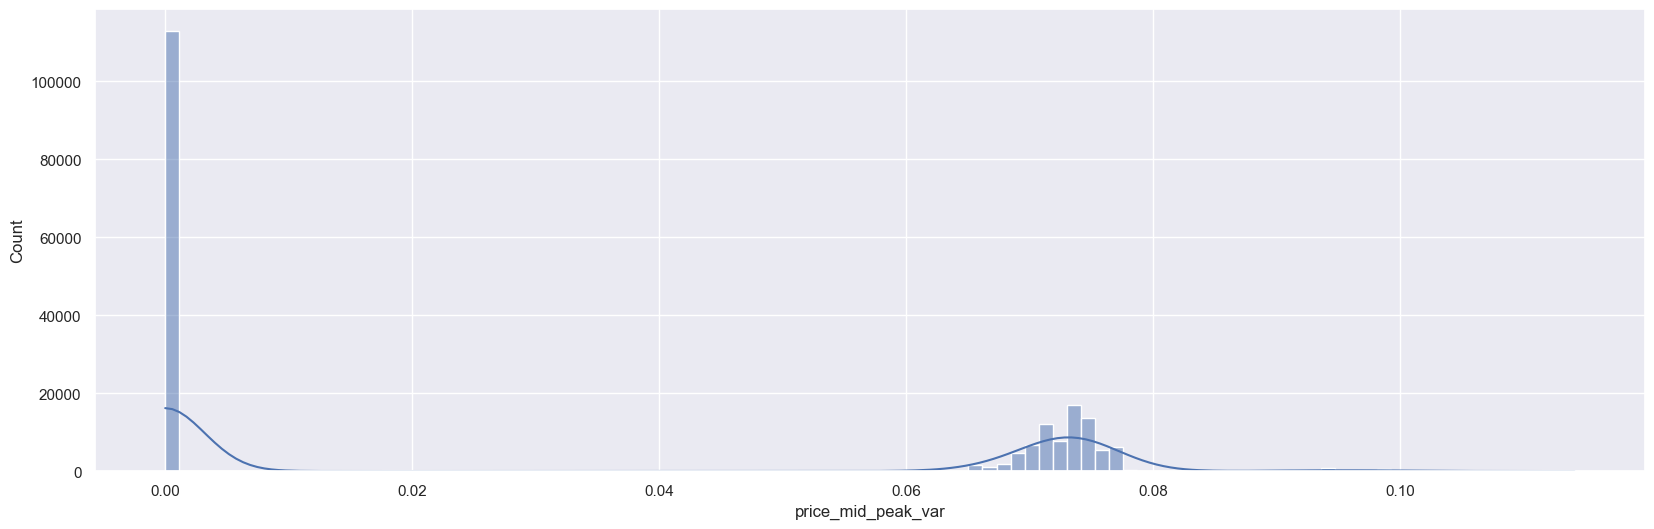

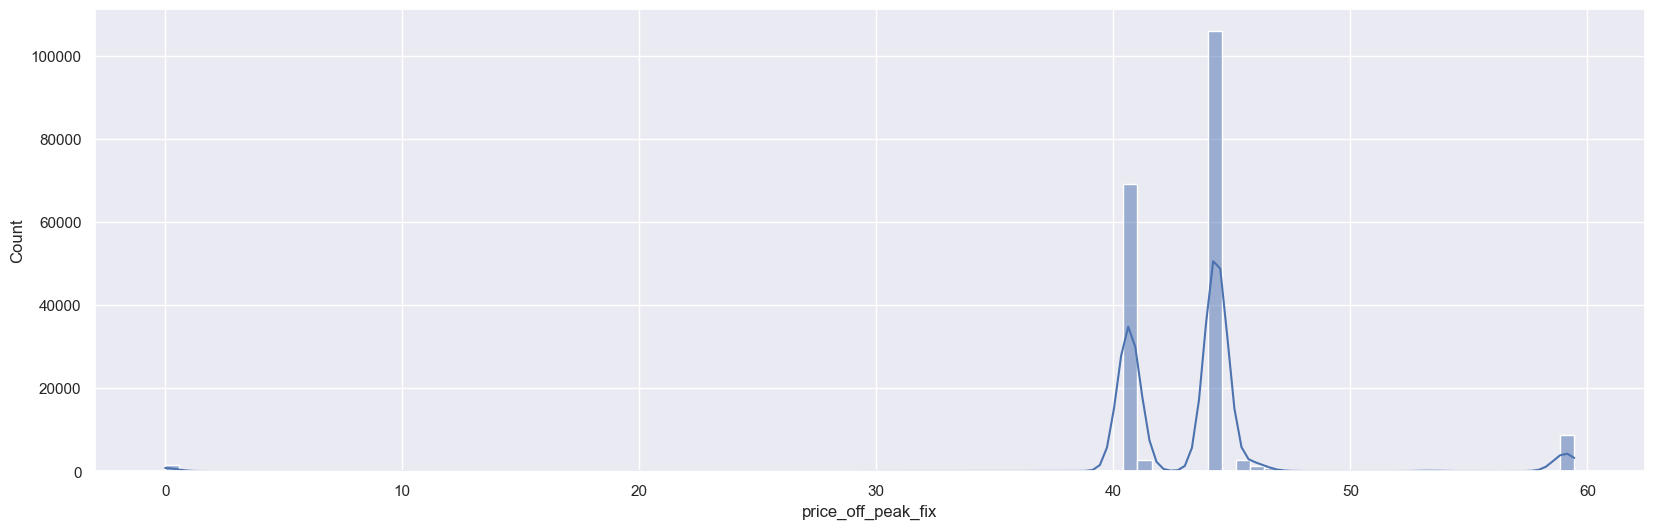

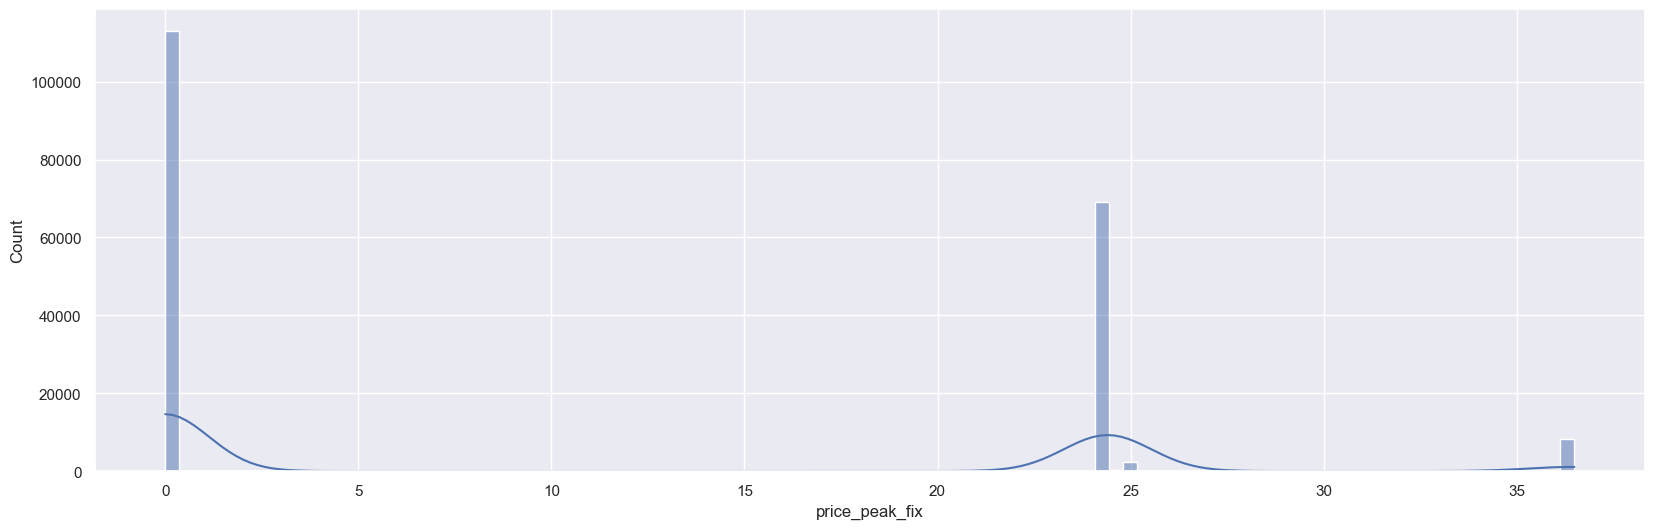

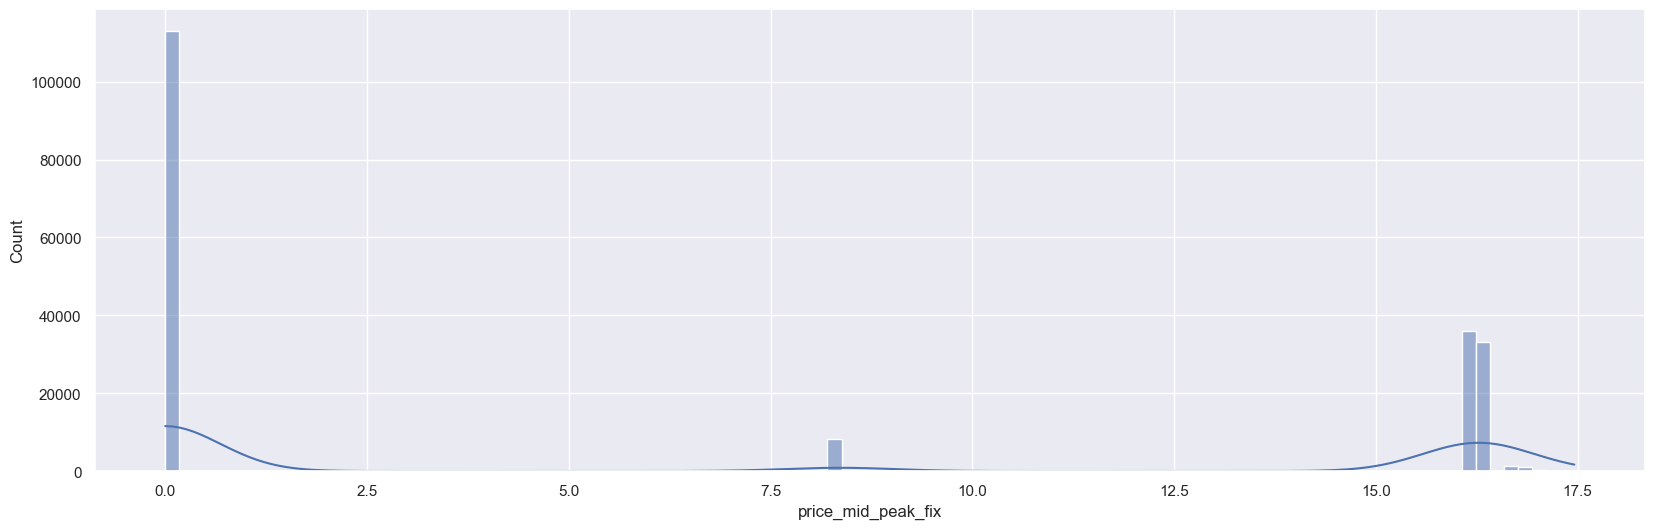

In [36]:
for attr in ['price_off_peak_var', 'price_peak_var', 'price_mid_peak_var', 'price_off_peak_fix', 'price_peak_fix', 'price_mid_peak_fix']:
    plot_histogram(price_data, attr, if_churn=False)

### Feature Engineering

In [37]:
#import other libraries

import datetime as dt
import numpy as np

In [38]:
client_data.head(3)

id  channel_sales  cons_12m  cons_gas_12m  \
0  24011ae4ebbe3035111d65fa7c15bc57              4         0         54946   
1  d29c2c54acc38ff3c0614d0a653813dd              0      4660             0   
2  764c75f661154dac3a6c254cd082ea7d              4       544             0   

   cons_last_month  date_activ    date_end date_modif_prod date_renewal  \
0                0  2013-06-15  2016-06-15      2015-11-01   2015-06-23   
1                0  2009-08-21  2016-08-30      2009-08-21   2015-08-31   
2                0  2010-04-16  2016-04-16      2010-04-16   2015-04-17   

   forecast_cons_12m  ...  has_gas  imp_cons  margin_gross_pow_ele  \
0               0.00  ...        t       0.0                 25.44   
1             189.95  ...        f       0.0                 16.38   
2              47.96  ...        f       0.0                 28.60   

   margin_net_pow_ele  nb_prod_act  net_margin num_years_antig  origin_up  \
0               25.44            2      678.99               3          4   
1               16.38            1       18.89               6          2   
2               28.60            1        6.60               6          2   

   pow_max  churn  
0   43.648      1  
1   13.800      0  
2   13.856      0  

[3 rows x 26 columns]

In [39]:
client_data['date_activ'] = pd.to_datetime(client_data['date_activ'], format = '%Y-%m-%d').dt.year
client_data['date_end'] = pd.to_datetime(client_data['date_end'], format = '%Y-%m-%d').dt.year
client_data['date_modif_prod'] = pd.to_datetime(client_data['date_modif_prod'], format = '%Y-%m-%d').dt.year
client_data['date_renewal'] = pd.to_datetime(client_data['date_renewal'], format = '%Y-%m-%d').dt.year
client_data.head(3)

id  channel_sales  cons_12m  cons_gas_12m  \
0  24011ae4ebbe3035111d65fa7c15bc57              4         0         54946   
1  d29c2c54acc38ff3c0614d0a653813dd              0      4660             0   
2  764c75f661154dac3a6c254cd082ea7d              4       544             0   

   cons_last_month  date_activ  date_end  date_modif_prod  date_renewal  \
0                0        2013      2016             2015          2015   
1                0        2009      2016             2009          2015   
2                0        2010      2016             2010          2015   

   forecast_cons_12m  ...  has_gas  imp_cons  margin_gross_pow_ele  \
0               0.00  ...        t       0.0                 25.44   
1             189.95  ...        f       0.0                 16.38   
2              47.96  ...        f       0.0                 28.60   

   margin_net_pow_ele  nb_prod_act  net_margin num_years_antig  origin_up  \
0               25.44            2      678.99               3          4   
1               16.38            1       18.89               6          2   
2               28.60            1        6.60               6          2   

   pow_max  churn  
0   43.648      1  
1   13.800      0  
2   13.856      0  

[3 rows x 26 columns]

In [40]:
# label encoding the has_gas column
client_data['has_gas'] = le.fit_transform(client_data['has_gas'])
client_data['has_gas'].value_counts()

0    11955
1     2651
Name: has_gas, dtype: int64

In [41]:
price_data = pd.read_csv('./Data_sets/price_data.csv')
price_data.head(3)

id  price_date  price_off_peak_var  \
0  038af19179925da21a25619c5a24b745  2015-01-01            0.151367   
1  038af19179925da21a25619c5a24b745  2015-02-01            0.151367   
2  038af19179925da21a25619c5a24b745  2015-03-01            0.151367   

   price_peak_var  price_mid_peak_var  price_off_peak_fix  price_peak_fix  \
0             0.0                 0.0           44.266931             0.0   
1             0.0                 0.0           44.266931             0.0   
2             0.0                 0.0           44.266931             0.0   

   price_mid_peak_fix  
0                 0.0  
1                 0.0  
2                 0.0

In [42]:
price_data['price_date'] = pd.to_datetime(price_data['price_date'], format = '%Y-%m-%d')
price_data.head()

id price_date  price_off_peak_var  \
0  038af19179925da21a25619c5a24b745 2015-01-01            0.151367   
1  038af19179925da21a25619c5a24b745 2015-02-01            0.151367   
2  038af19179925da21a25619c5a24b745 2015-03-01            0.151367   
3  038af19179925da21a25619c5a24b745 2015-04-01            0.149626   
4  038af19179925da21a25619c5a24b745 2015-05-01            0.149626   

   price_peak_var  price_mid_peak_var  price_off_peak_fix  price_peak_fix  \
0             0.0                 0.0           44.266931             0.0   
1             0.0                 0.0           44.266931             0.0   
2             0.0                 0.0           44.266931             0.0   
3             0.0                 0.0           44.266931             0.0   
4             0.0                 0.0           44.266931             0.0   

   price_mid_peak_fix  
0                 0.0  
1                 0.0  
2                 0.0  
3                 0.0  
4                 0.0

### Diffrence in prices in december and preceding january 

In [43]:
#groupping the diffrent prices by id and month
monthly_price_by_id = price_data.groupby(['id','price_date']).agg({'price_off_peak_var': 'mean',
                                                                  'price_off_peak_fix': 'mean',
                                                                  'price_peak_var': 'mean',
                                                                  'price_peak_fix': 'mean',
                                                                  'price_mid_peak_var': 'mean',
                                                                  'price_mid_peak_fix': 'mean'}).reset_index()


In [44]:
# Get january and december prices
jan_prices = monthly_price_by_id.groupby('id').first().reset_index()
dec_prices = monthly_price_by_id.groupby('id').last().reset_index()

In [45]:
# Calculate the difference of the diffrent prices
diff = pd.merge(dec_prices.rename(columns={'price_off_peak_var': 'dec_1', 
                                           'price_off_peak_fix': 'dec_2', 
                                          'price_peak_var': 'dec_3', 
                                          'price_peak_fix': 'dec_4', 
                                          'price_mid_peak_var': 'dec_5', 
                                          'price_mid_peak_fix': 'dec_6'}), jan_prices.drop(columns='price_date'), on='id')
diff['offpeakvar_diff_dec_jan'] = diff['dec_1'] - diff['price_off_peak_var']
diff['offpeakfix_diff_dec_jan'] = diff['dec_2'] - diff['price_off_peak_fix']
diff['peakvar_diff_dec_jan'] = diff['dec_3'] - diff['price_peak_var']
diff['peakfix_diff_dec_jan'] = diff['dec_4'] - diff['price_peak_fix']
diff['midpeakvar_diff_dec_jan'] = diff['dec_5'] - diff['price_mid_peak_var']
diff['midpeakfix_diff_dec_jan'] = diff['dec_6'] - diff['price_mid_peak_fix']
diff = diff[['id', 'offpeakvar_diff_dec_jan','offpeakfix_diff_dec_jan', 'peakvar_diff_dec_jan',
             'peakfix_diff_dec_jan', 'midpeakvar_diff_dec_jan', 'midpeakfix_diff_dec_jan']]
diff.head()

id  offpeakvar_diff_dec_jan  \
0  0002203ffbb812588b632b9e628cc38d                -0.006192   
1  0004351ebdd665e6ee664792efc4fd13                -0.004104   
2  0010bcc39e42b3c2131ed2ce55246e3c                 0.050443   
3  0010ee3855fdea87602a5b7aba8e42de                -0.010018   
4  00114d74e963e47177db89bc70108537                -0.003994   

   offpeakfix_diff_dec_jan  peakvar_diff_dec_jan  peakfix_diff_dec_jan  \
0                 0.162916             -0.002302              0.097749   
1                 0.177779              0.000000              0.000000   
2                 1.500000              0.000000              0.000000   
3                 0.162916             -0.005120              0.097749   
4                -0.000001              0.000000              0.000000   

   midpeakvar_diff_dec_jan  midpeakfix_diff_dec_jan  
0                 0.003487                 0.065166  
1                 0.000000                 0.000000  
2                 0.000000                 0.000000  
3                 0.000763                 0.065166  
4                 0.000000                 0.000000

In [46]:
#now merge the diff data to client data.
train_data = client_data.merge(diff, on='id', how='left')
train_data.head()

id  channel_sales  cons_12m  cons_gas_12m  \
0  24011ae4ebbe3035111d65fa7c15bc57              4         0         54946   
1  d29c2c54acc38ff3c0614d0a653813dd              0      4660             0   
2  764c75f661154dac3a6c254cd082ea7d              4       544             0   
3  bba03439a292a1e166f80264c16191cb              5      1584             0   
4  149d57cf92fc41cf94415803a877cb4b              0      4425             0   

   cons_last_month  date_activ  date_end  date_modif_prod  date_renewal  \
0                0        2013      2016             2015          2015   
1                0        2009      2016             2009          2015   
2                0        2010      2016             2010          2015   
3                0        2010      2016             2010          2015   
4              526        2010      2016             2010          2015   

   forecast_cons_12m  ...  num_years_antig  origin_up  pow_max  churn  \
0               0.00  ...                3          4   43.648      1   
1             189.95  ...                6          2   13.800      0   
2              47.96  ...                6          2   13.856      0   
3             240.04  ...                6          2   13.200      0   
4             445.75  ...                6          2   19.800      0   

   offpeakvar_diff_dec_jan  offpeakfix_diff_dec_jan  peakvar_diff_dec_jan  \
0                 0.020057                 3.700961             -0.017912   
1                -0.003767                 0.177779              0.000000   
2                -0.004670                 0.177779              0.000528   
3                -0.004547                 0.177779              0.000000   
4                -0.006192                 0.162916             -0.002302   

   peakfix_diff_dec_jan  midpeakvar_diff_dec_jan  midpeakfix_diff_dec_jan  
0            -24.339581                -0.071536               -16.226389  
1              0.000000                 0.000000                 0.000000  
2              0.000000                 0.000000                 0.000000  
3              0.000000                 0.000000                 0.000000  
4              0.097749                 0.003487                 0.065166  

[5 rows x 32 columns]

### calculating the average price change accross a period 

This will give the detailed information about the change in price of energy and it will help our model to find any relation between hike in price and the  churn of customers.

In [47]:
#grouping the prices with companies id
avg_price = price_data.groupby(['id']).agg({'price_off_peak_var': 'mean',
                                            'price_off_peak_fix': 'mean',
                                            'price_peak_var': 'mean',
                                            'price_peak_fix': 'mean',
                                            'price_mid_peak_var': 'mean',
                                            'price_mid_peak_fix': 'mean'}).reset_index()
avg_price.head(3)

id  price_off_peak_var  price_off_peak_fix  \
0  0002203ffbb812588b632b9e628cc38d            0.124338           40.701732   
1  0004351ebdd665e6ee664792efc4fd13            0.146426           44.385450   
2  0010bcc39e42b3c2131ed2ce55246e3c            0.181558           45.319710   

   price_peak_var  price_peak_fix  price_mid_peak_var  price_mid_peak_fix  
0        0.103794       24.421038             0.07316           16.280694  
1        0.000000        0.000000             0.00000            0.000000  
2        0.000000        0.000000             0.00000            0.000000

In [48]:
# diffrence between the avg of same consecutive periods.
avg_price['avg_price_off_peak_peak_var'] = avg_price['price_off_peak_var'] - avg_price['price_peak_var']
avg_price['avg_price_peak_mid_peak_var'] = avg_price['price_peak_var'] - avg_price['price_mid_peak_var']
avg_price['avg_price_off_peak_mid_peak_var'] = avg_price['price_off_peak_var'] - avg_price['price_mid_peak_var']
avg_price['avg_price_off_peak_peak_fix'] = avg_price['price_off_peak_fix'] - avg_price['price_peak_fix']
avg_price['avg_price_peak_mid_peak_fix'] = avg_price['price_peak_fix'] - avg_price['price_mid_peak_fix']
avg_price['avg_price_off_peak_mid_peak_fix'] = avg_price['price_off_peak_fix'] - avg_price['price_mid_peak_fix']

avg_price.head(3)

id  price_off_peak_var  price_off_peak_fix  \
0  0002203ffbb812588b632b9e628cc38d            0.124338           40.701732   
1  0004351ebdd665e6ee664792efc4fd13            0.146426           44.385450   
2  0010bcc39e42b3c2131ed2ce55246e3c            0.181558           45.319710   

   price_peak_var  price_peak_fix  price_mid_peak_var  price_mid_peak_fix  \
0        0.103794       24.421038             0.07316           16.280694   
1        0.000000        0.000000             0.00000            0.000000   
2        0.000000        0.000000             0.00000            0.000000   

   avg_price_off_peak_peak_var  avg_price_peak_mid_peak_var  \
0                     0.020545                     0.030633   
1                     0.146426                     0.000000   
2                     0.181558                     0.000000   

   avg_price_off_peak_mid_peak_var  avg_price_off_peak_peak_fix  \
0                         0.051178                    16.280694   
1                         0.146426                    44.385450   
2                         0.181558                    45.319710   

   avg_price_peak_mid_peak_fix  avg_price_off_peak_mid_peak_fix  
0                     8.140345                        24.421038  
1                     0.000000                        44.385450  
2                     0.000000                        45.319710

In [49]:
avg_price = avg_price[['id', 'avg_price_off_peak_peak_var', 'avg_price_peak_mid_peak_var', 
                      'avg_price_off_peak_mid_peak_var', 'avg_price_off_peak_peak_fix', 
                      'avg_price_peak_mid_peak_fix', 'avg_price_off_peak_mid_peak_fix']]
avg_price.head(2)

id  avg_price_off_peak_peak_var  \
0  0002203ffbb812588b632b9e628cc38d                     0.020545   
1  0004351ebdd665e6ee664792efc4fd13                     0.146426   

   avg_price_peak_mid_peak_var  avg_price_off_peak_mid_peak_var  \
0                     0.030633                         0.051178   
1                     0.000000                         0.146426   

   avg_price_off_peak_peak_fix  avg_price_peak_mid_peak_fix  \
0                    16.280694                     8.140345   
1                    44.385450                     0.000000   

   avg_price_off_peak_mid_peak_fix  
0                        24.421038  
1                        44.385450

In [50]:
#merging the avg_data with train_data
train_data = train_data.merge(avg_price, on = 'id', how = 'left')
train_data.head(2)

id  channel_sales  cons_12m  cons_gas_12m  \
0  24011ae4ebbe3035111d65fa7c15bc57              4         0         54946   
1  d29c2c54acc38ff3c0614d0a653813dd              0      4660             0   

   cons_last_month  date_activ  date_end  date_modif_prod  date_renewal  \
0                0        2013      2016             2015          2015   
1                0        2009      2016             2009          2015   

   forecast_cons_12m  ...  peakvar_diff_dec_jan  peakfix_diff_dec_jan  \
0               0.00  ...             -0.017912            -24.339581   
1             189.95  ...              0.000000              0.000000   

   midpeakvar_diff_dec_jan  midpeakfix_diff_dec_jan  \
0                -0.071536               -16.226389   
1                 0.000000                 0.000000   

   avg_price_off_peak_peak_var  avg_price_peak_mid_peak_var  \
0                     0.024038                     0.034219   
1                     0.142485                     0.007124   

   avg_price_off_peak_mid_peak_var  avg_price_off_peak_peak_fix  \
0                         0.058257                    18.590255   
1                         0.149609                    44.311375   

   avg_price_peak_mid_peak_fix  avg_price_off_peak_mid_peak_fix  
0                      7.45067                        26.040925  
1                      0.00000                        44.311375  

[2 rows x 38 columns]

### Lets Transform the skewed continues numeric data.

In [51]:
train_data[['cons_12m', 'cons_gas_12m', 'cons_last_month','forecast_cons_12m', 
            'forecast_cons_year', 'forecast_discount_energy','forecast_meter_rent_12m', 
            'forecast_price_energy_off_peak', 'forecast_price_energy_peak', 
            'forecast_price_pow_off_peak']].describe()

cons_12m  cons_gas_12m  cons_last_month  forecast_cons_12m  \
count  1.460600e+04  1.460600e+04     14606.000000       14606.000000   
mean   1.592203e+05  2.809238e+04     16090.269752        1868.614880   
std    5.734653e+05  1.629731e+05     64364.196422        2387.571531   
min    0.000000e+00  0.000000e+00         0.000000           0.000000   
25%    5.674750e+03  0.000000e+00         0.000000         494.995000   
50%    1.411550e+04  0.000000e+00       792.500000        1112.875000   
75%    4.076375e+04  0.000000e+00      3383.000000        2401.790000   
max    6.207104e+06  4.154590e+06    771203.000000       82902.830000   

       forecast_cons_year  forecast_discount_energy  forecast_meter_rent_12m  \
count        14606.000000              14606.000000             14606.000000   
mean          1399.762906                  0.966726                63.086871   
std           3247.786255                  5.108289                66.165783   
min              0.000000                  0.000000                 0.000000   
25%              0.000000                  0.000000                16.180000   
50%            314.000000                  0.000000                18.795000   
75%           1745.750000                  0.000000               131.030000   
max         175375.000000                 30.000000               599.310000   

       forecast_price_energy_off_peak  forecast_price_energy_peak  \
count                    14606.000000                14606.000000   
mean                         0.137283                    0.050491   
std                          0.024623                    0.049037   
min                          0.000000                    0.000000   
25%                          0.116340                    0.000000   
50%                          0.143166                    0.084138   
75%                          0.146348                    0.098837   
max                          0.273963                    0.195975   

       forecast_price_pow_off_peak  
count                 14606.000000  
mean                     43.130056  
std                       4.485988  
min                       0.000000  
25%                      40.606701  
50%                      44.311378  
75%                      44.311378  
max                      59.266378

The Standard deviation of some of the featueres are high. we can transform these skewed  values by using lograthmic transformation.


In [52]:
train_data["cons_12m"] = np.log10(train_data["cons_12m"] + 1)
train_data["cons_gas_12m"] = np.log10(train_data["cons_gas_12m"] + 1)
train_data["cons_last_month"] = np.log10(train_data["cons_last_month"] + 1)
train_data["forecast_cons_12m"] = np.log10(train_data["forecast_cons_12m"] + 1)
train_data["forecast_cons_year"] = np.log10(train_data["forecast_cons_year"] + 1)
train_data["forecast_meter_rent_12m"] = np.log10(train_data["forecast_meter_rent_12m"] + 1)
train_data["imp_cons"] = np.log10(train_data["imp_cons"] + 1)

In [53]:
train_data[["cons_12m", "cons_gas_12m", "cons_last_month", "forecast_cons_12m", "forecast_cons_year",
           "forecast_meter_rent_12m", "imp_cons"]].describe()

cons_12m  cons_gas_12m  cons_last_month  forecast_cons_12m  \
count  14606.000000  14606.000000     14606.000000       14606.000000   
mean       4.223939      0.779244         2.264646           2.962177   
std        0.884515      1.717071         1.769305           0.683592   
min        0.000000      0.000000         0.000000           0.000000   
25%        3.754023      0.000000         0.000000           2.695477   
50%        4.149727      0.000000         2.899547           3.046836   
75%        4.610285      0.000000         3.529430           3.380716   
max        6.792889      6.618528         5.887169           4.918575   

       forecast_cons_year  forecast_meter_rent_12m      imp_cons  
count        14606.000000             14606.000000  14606.000000  
mean             1.784610                 1.517203      1.240750  
std              1.584986                 0.571481      1.138322  
min              0.000000                 0.000000      0.000000  
25%              0.000000                 1.235023      0.000000  
50%              2.498311                 1.296555      1.584275  
75%              3.242231                 2.120673      2.289990  
max              5.243970                 2.778376      4.177357

Now the std is low as compared to earlier(without transformation).

lets plot these distribution to see the changes.

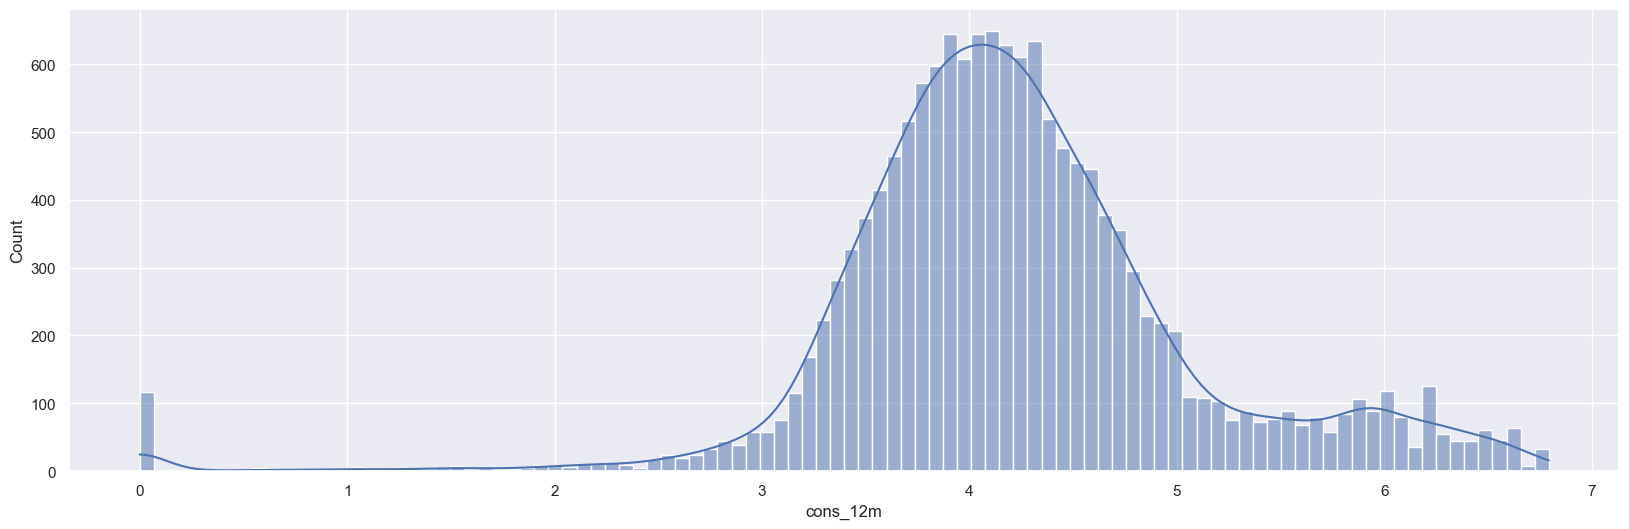

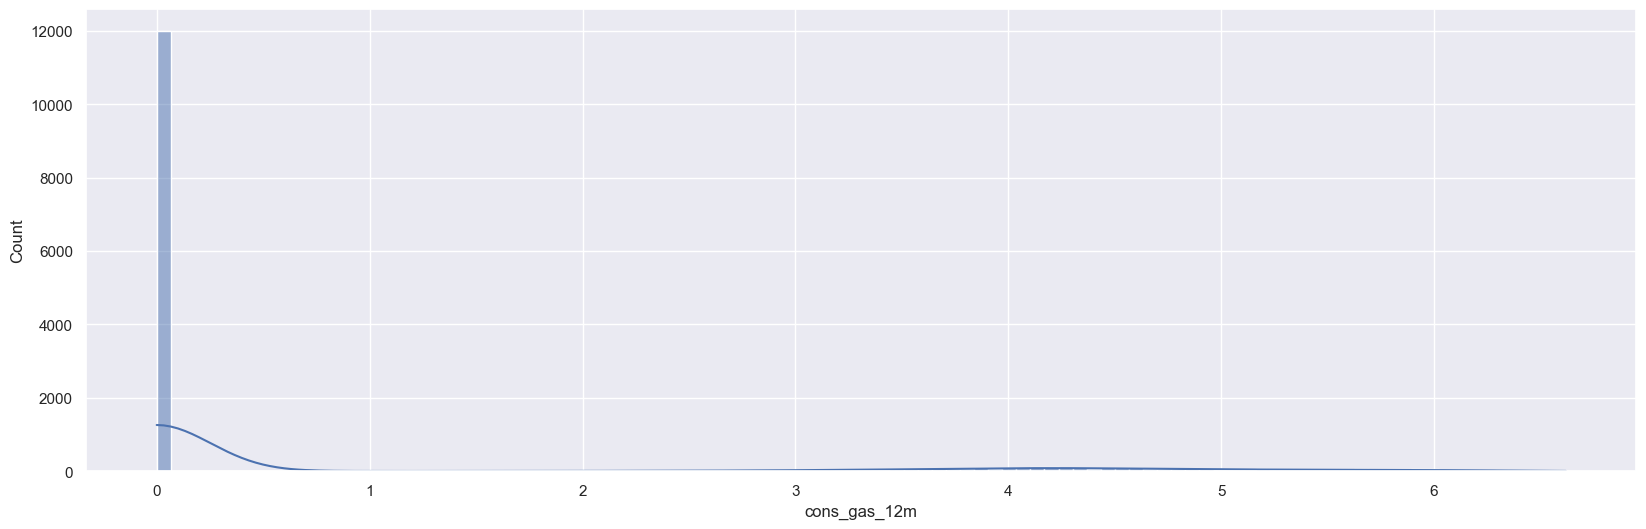

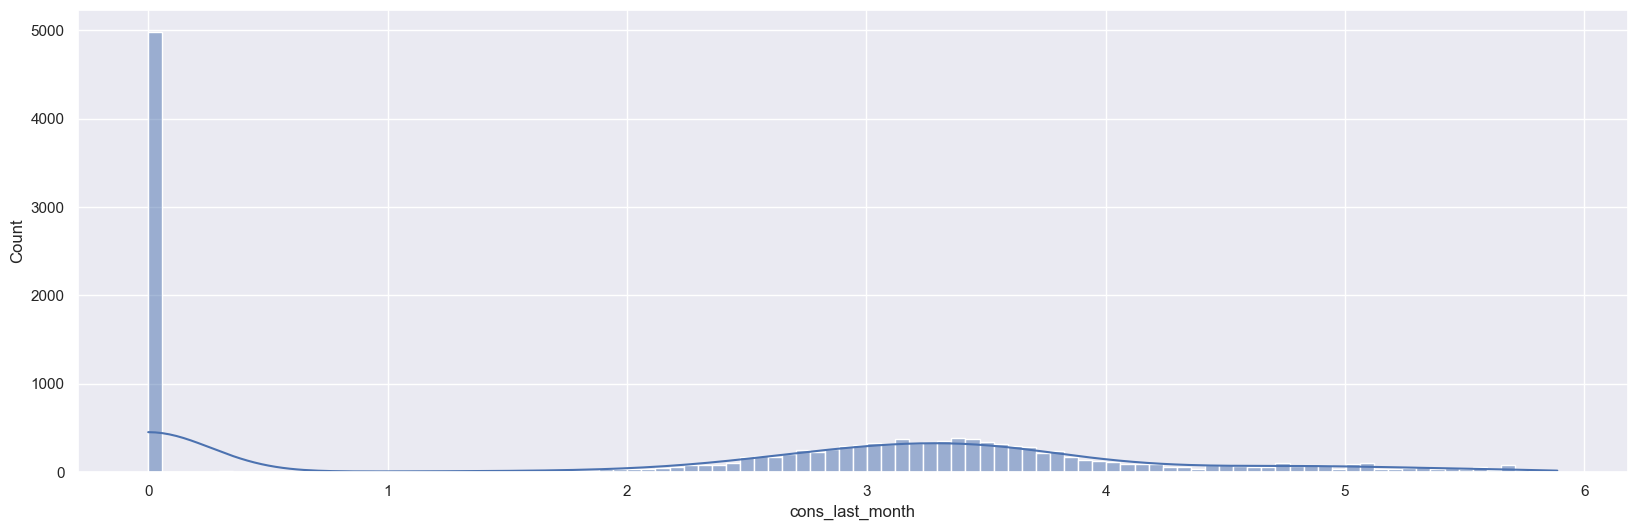

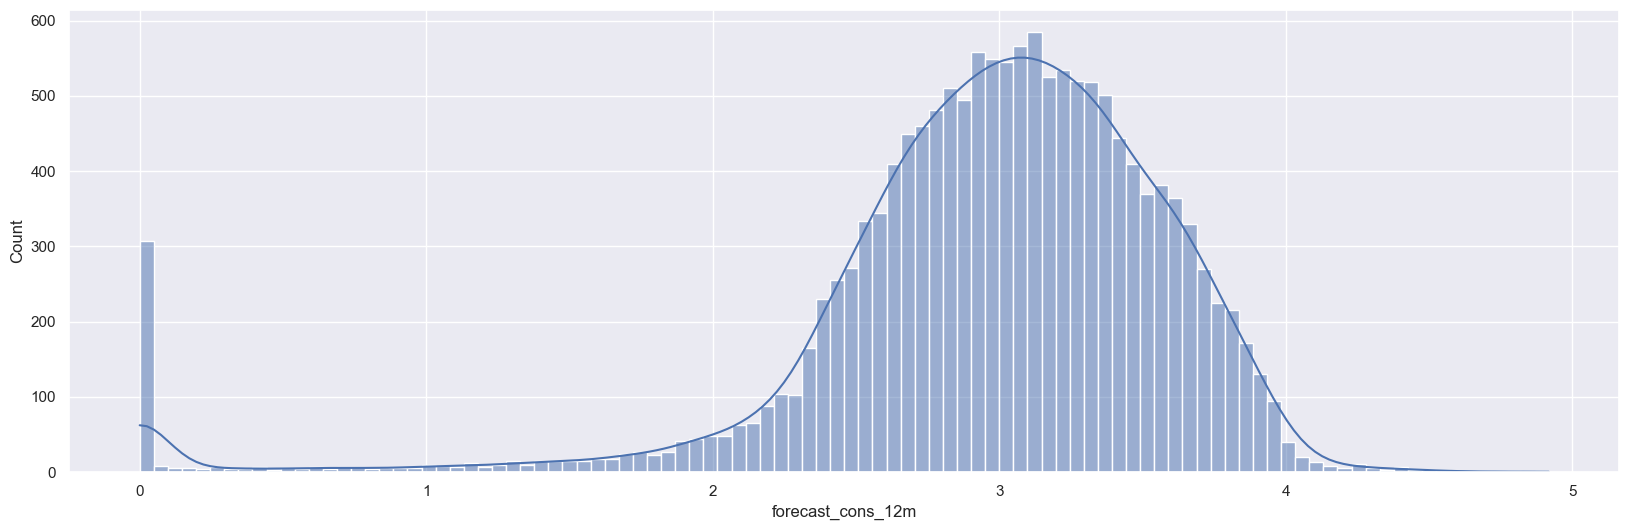

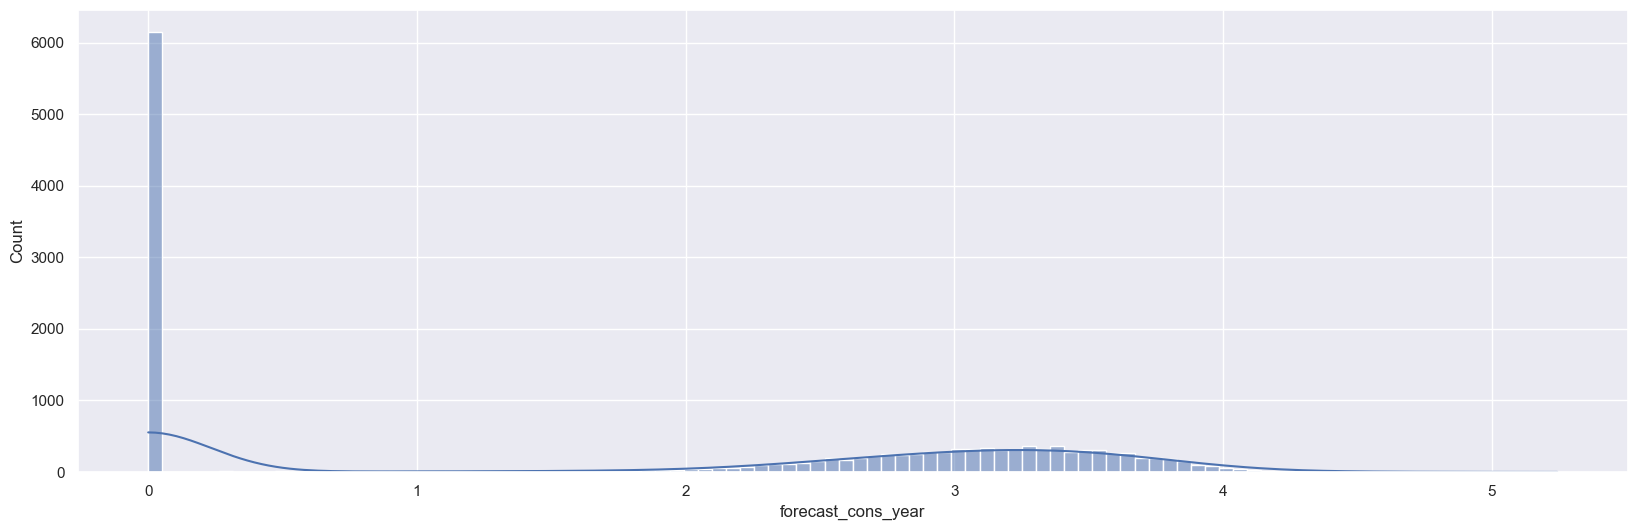

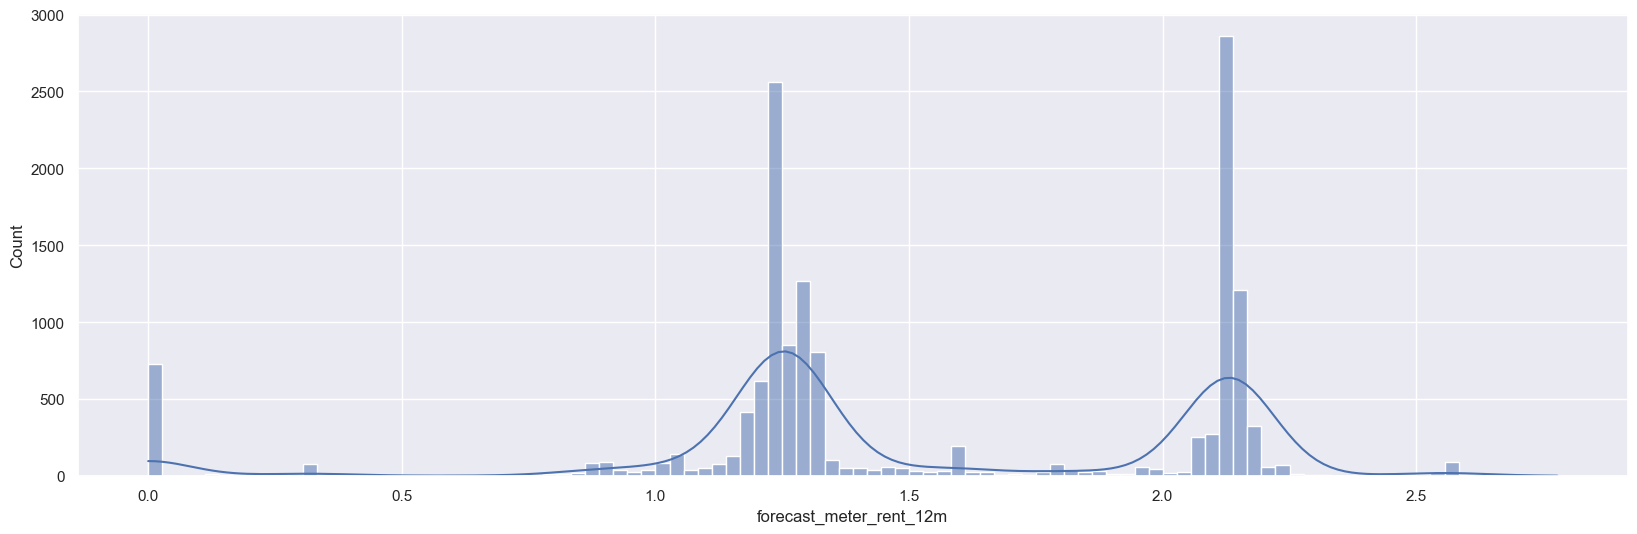

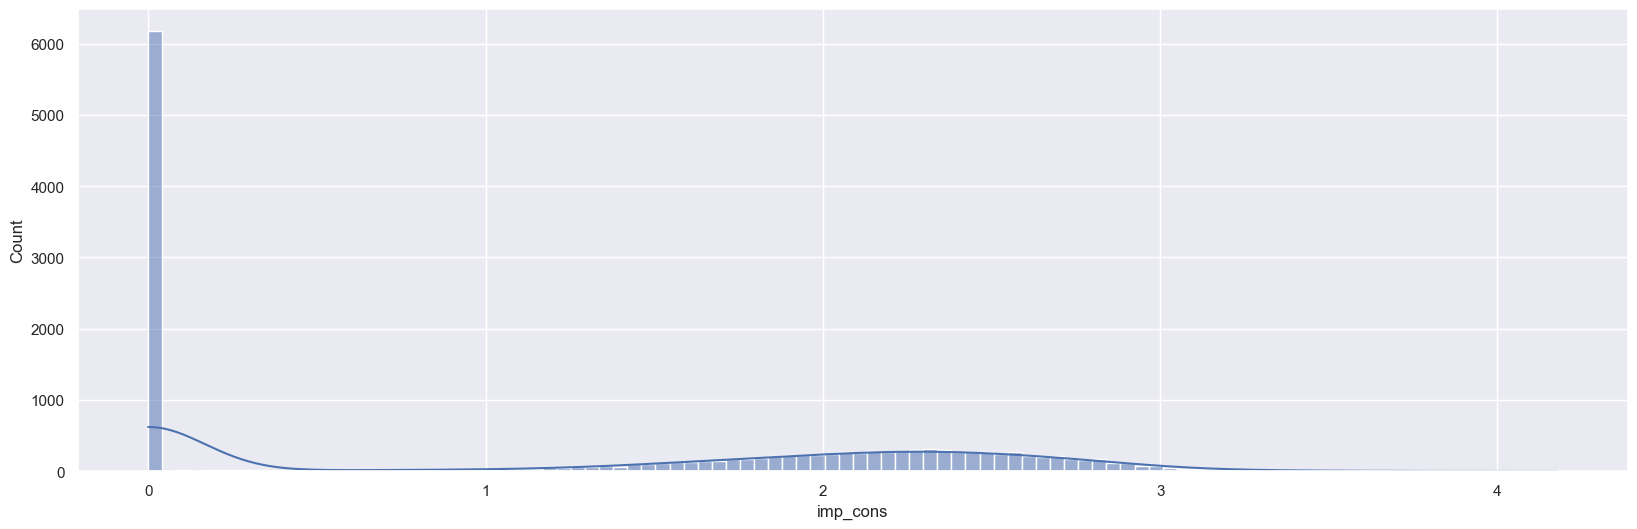

In [54]:
for col in ["cons_12m", "cons_gas_12m", "cons_last_month", "forecast_cons_12m", "forecast_cons_year",
           "forecast_meter_rent_12m", "imp_cons"]:
    plot_histogram(train_data, col, if_churn = False)

In [55]:
#calculating the tenure of the customers.
train_data['tenure'] = train_data['date_end'] - train_data['date_activ']
train_data.head()

id  channel_sales  cons_12m  cons_gas_12m  \
0  24011ae4ebbe3035111d65fa7c15bc57              4  0.000000      4.739944   
1  d29c2c54acc38ff3c0614d0a653813dd              0  3.668479      0.000000   
2  764c75f661154dac3a6c254cd082ea7d              4  2.736397      0.000000   
3  bba03439a292a1e166f80264c16191cb              5  3.200029      0.000000   
4  149d57cf92fc41cf94415803a877cb4b              0  3.646011      0.000000   

   cons_last_month  date_activ  date_end  date_modif_prod  date_renewal  \
0         0.000000        2013      2016             2015          2015   
1         0.000000        2009      2016             2009          2015   
2         0.000000        2010      2016             2010          2015   
3         0.000000        2010      2016             2010          2015   
4         2.721811        2010      2016             2010          2015   

   forecast_cons_12m  ...  peakfix_diff_dec_jan  midpeakvar_diff_dec_jan  \
0           0.000000  ...            -24.339581                -0.071536   
1           2.280920  ...              0.000000                 0.000000   
2           1.689841  ...              0.000000                 0.000000   
3           2.382089  ...              0.000000                 0.000000   
4           2.650065  ...              0.097749                 0.003487   

   midpeakfix_diff_dec_jan  avg_price_off_peak_peak_var  \
0               -16.226389                     0.024038   
1                 0.000000                     0.142485   
2                 0.000000                     0.082090   
3                 0.000000                     0.151210   
4                 0.065166                     0.020536   

   avg_price_peak_mid_peak_var  avg_price_off_peak_mid_peak_var  \
0                     0.034219                         0.058257   
1                     0.007124                         0.149609   
2                     0.088421                         0.170512   
3                     0.000000                         0.151210   
4                     0.030773                         0.051309   

   avg_price_off_peak_peak_fix  avg_price_peak_mid_peak_fix  \
0                    18.590255                     7.450670   
1                    44.311375                     0.000000   
2                    44.385450                     0.000000   
3                    44.400265                     0.000000   
4                    16.275263                     8.137629   

   avg_price_off_peak_mid_peak_fix  tenure  
0                        26.040925       3  
1                        44.311375       7  
2                        44.385450       6  
3                        44.400265       6  
4                        24.412893       6  

[5 rows x 39 columns]

### Coorelation

lets see the coorelation between all these features.

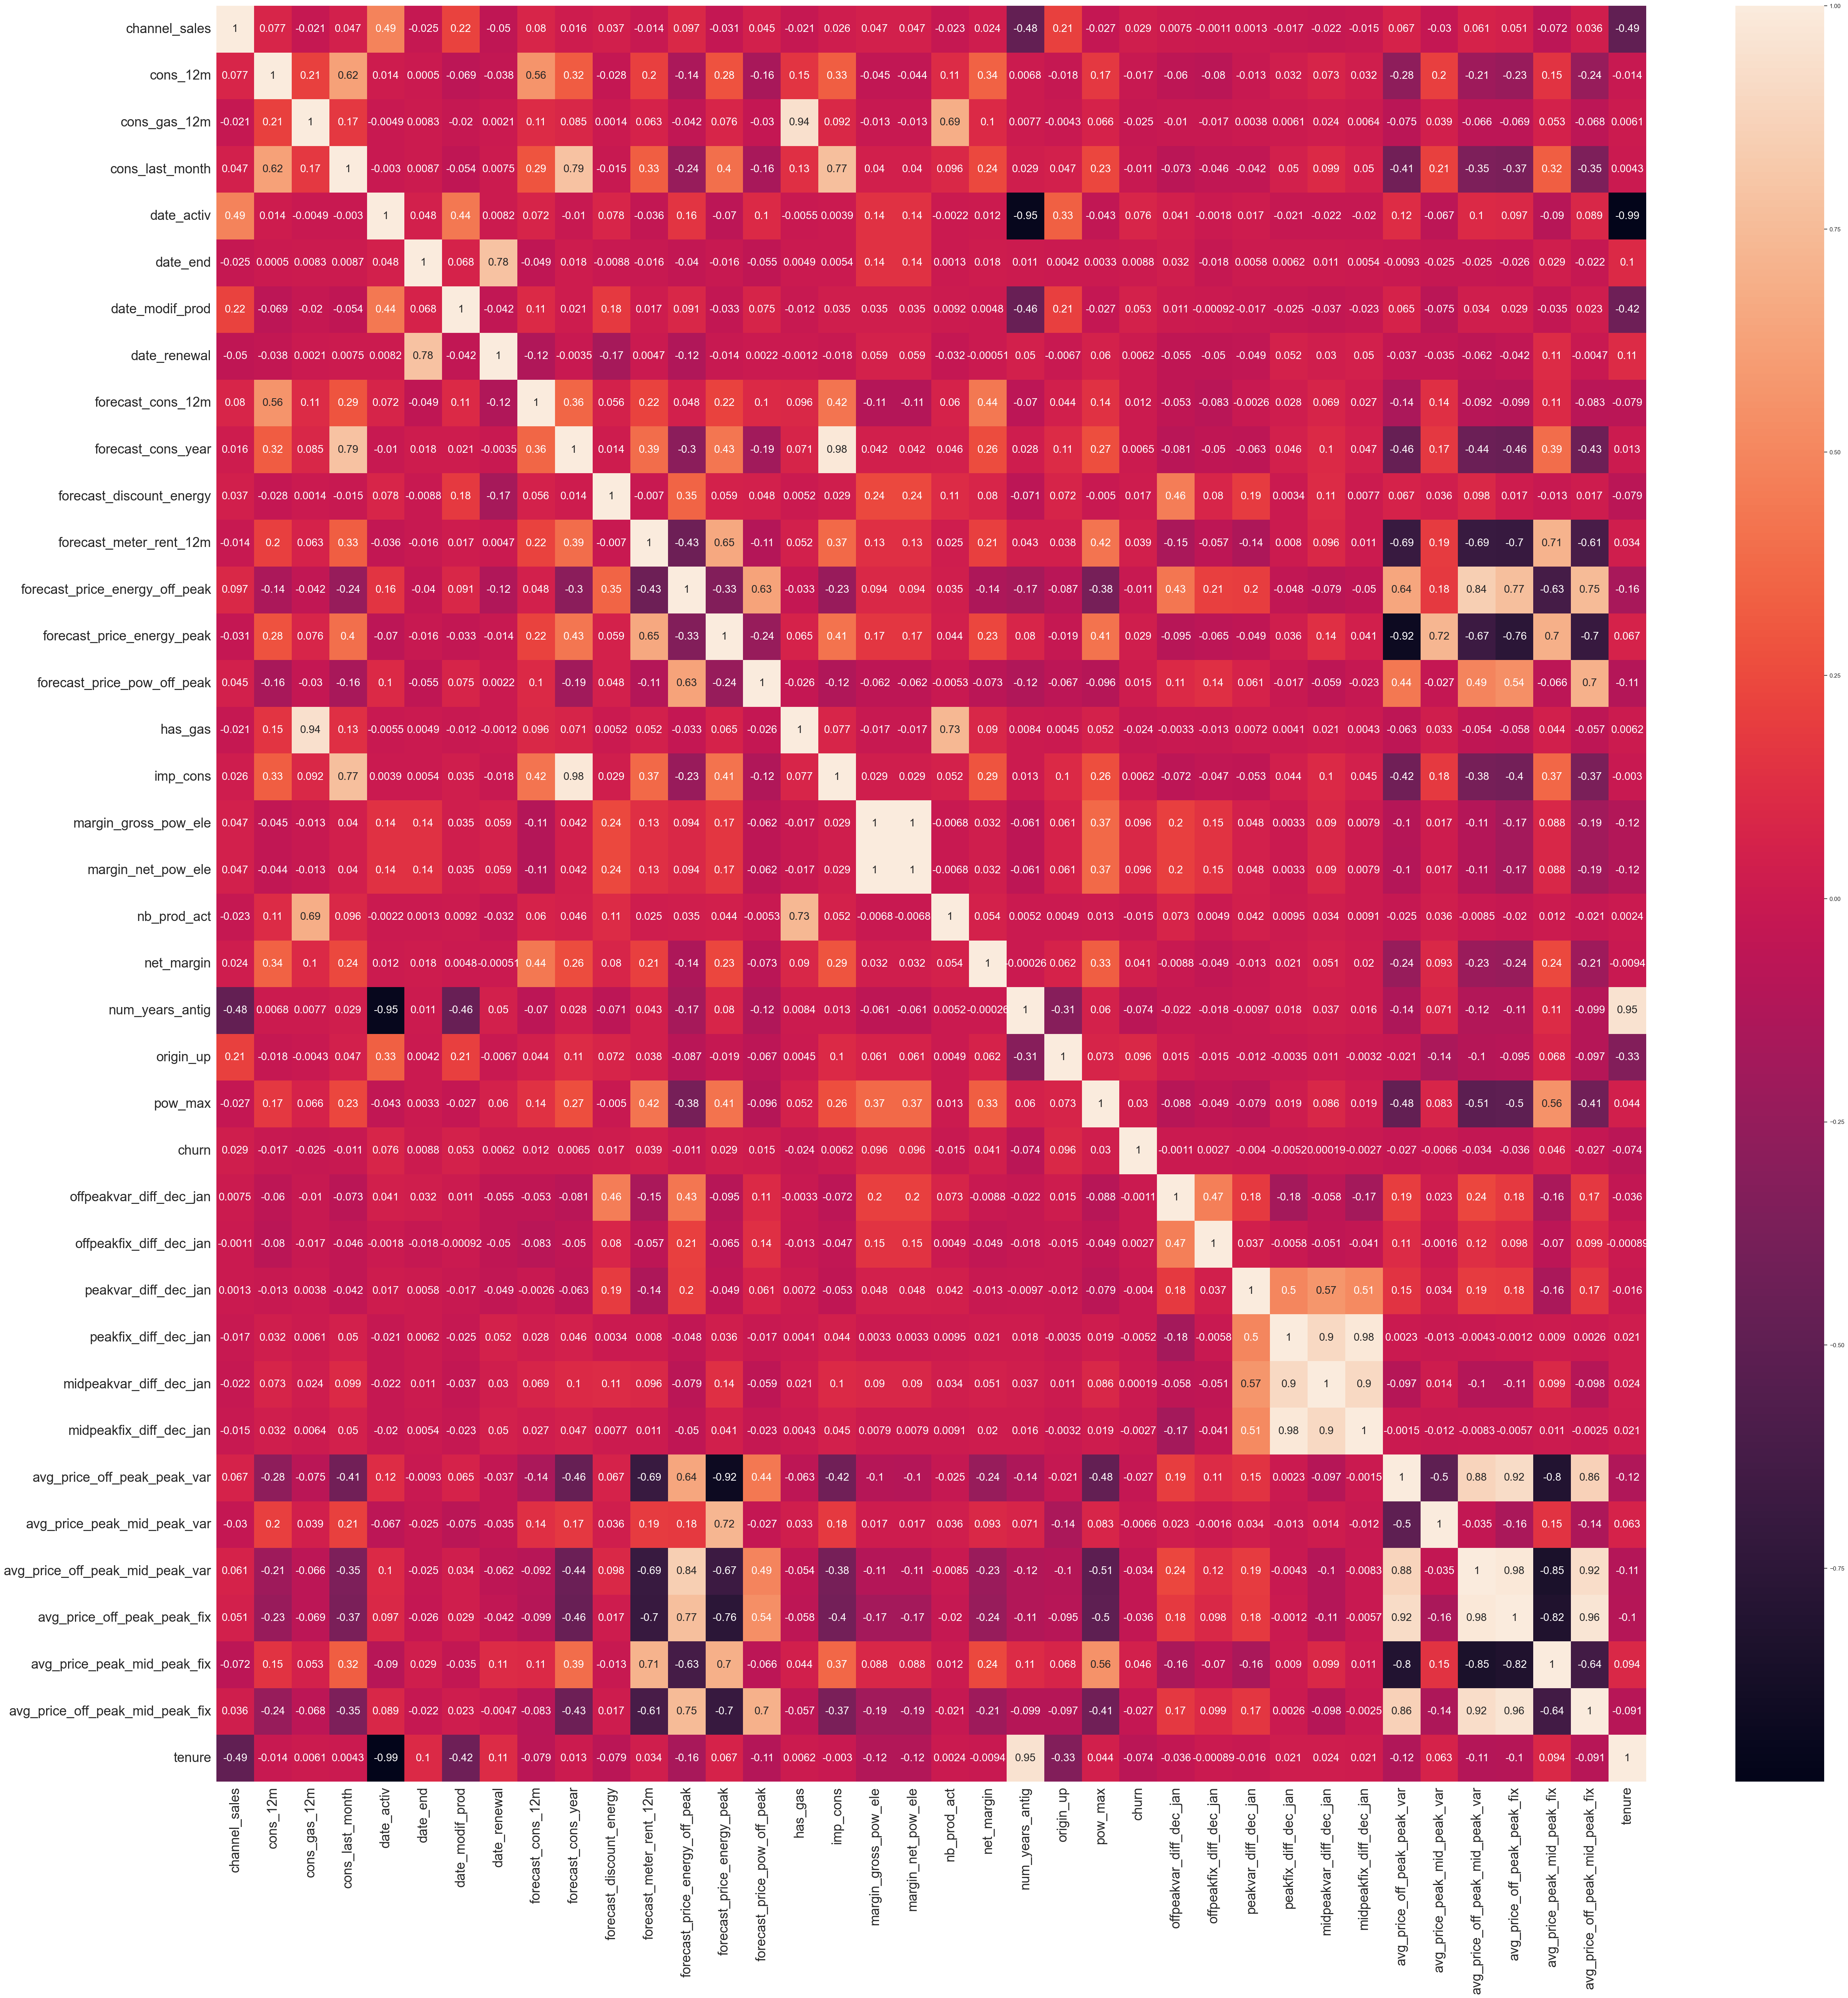

In [56]:
plt.figure(figsize=(60, 60))
sns.heatmap(
    train_data.corr(), 
    #xticklabels=correlation.columns.values,
    #yticklabels=correlation.columns.values, 
    annot=True, 
    annot_kws={'size': 20}
)
# Axis ticks size
plt.xticks(fontsize=25)
plt.yticks(fontsize=25)
plt.show()

### Drop Columns

Drop the columns which are highly coorelated with other columns.

columns that are greater or equal to 0.95 in coorelation matrix we will drop them.

In [57]:
train_data = train_data.drop(columns=['num_years_antig', 'forecast_cons_year',
                                      'peakfix_diff_dec_jan', 'avg_price_off_peak_peak_fix'])
train_data.head()

id  channel_sales  cons_12m  cons_gas_12m  \
0  24011ae4ebbe3035111d65fa7c15bc57              4  0.000000      4.739944   
1  d29c2c54acc38ff3c0614d0a653813dd              0  3.668479      0.000000   
2  764c75f661154dac3a6c254cd082ea7d              4  2.736397      0.000000   
3  bba03439a292a1e166f80264c16191cb              5  3.200029      0.000000   
4  149d57cf92fc41cf94415803a877cb4b              0  3.646011      0.000000   

   cons_last_month  date_activ  date_end  date_modif_prod  date_renewal  \
0         0.000000        2013      2016             2015          2015   
1         0.000000        2009      2016             2009          2015   
2         0.000000        2010      2016             2010          2015   
3         0.000000        2010      2016             2010          2015   
4         2.721811        2010      2016             2010          2015   

   forecast_cons_12m  ...  offpeakfix_diff_dec_jan  peakvar_diff_dec_jan  \
0           0.000000  ...                 3.700961             -0.017912   
1           2.280920  ...                 0.177779              0.000000   
2           1.689841  ...                 0.177779              0.000528   
3           2.382089  ...                 0.177779              0.000000   
4           2.650065  ...                 0.162916             -0.002302   

   midpeakvar_diff_dec_jan  midpeakfix_diff_dec_jan  \
0                -0.071536               -16.226389   
1                 0.000000                 0.000000   
2                 0.000000                 0.000000   
3                 0.000000                 0.000000   
4                 0.003487                 0.065166   

   avg_price_off_peak_peak_var  avg_price_peak_mid_peak_var  \
0                     0.024038                     0.034219   
1                     0.142485                     0.007124   
2                     0.082090                     0.088421   
3                     0.151210                     0.000000   
4                     0.020536                     0.030773   

   avg_price_off_peak_mid_peak_var  avg_price_peak_mid_peak_fix  \
0                         0.058257                     7.450670   
1                         0.149609                     0.000000   
2                         0.170512                     0.000000   
3                         0.151210                     0.000000   
4                         0.051309                     8.137629   

   avg_price_off_peak_mid_peak_fix  tenure  
0                        26.040925       3  
1                        44.311375       7  
2                        44.385450       6  
3                        44.400265       6  
4                        24.412893       6  

[5 rows x 35 columns]

In [58]:
# lets check for any null values again
train_data.isnull().sum()

id                                 0
channel_sales                      0
cons_12m                           0
cons_gas_12m                       0
cons_last_month                    0
date_activ                         0
date_end                           0
date_modif_prod                    0
date_renewal                       0
forecast_cons_12m                  0
forecast_discount_energy           0
forecast_meter_rent_12m            0
forecast_price_energy_off_peak     0
forecast_price_energy_peak         0
forecast_price_pow_off_peak        0
has_gas                            0
imp_cons                           0
margin_gross_pow_ele               0
margin_net_pow_ele                 0
nb_prod_act                        0
net_margin                         0
origin_up                          0
pow_max                            0
churn                              0
offpeakvar_diff_dec_jan            0
offpeakfix_diff_dec_jan            0
peakvar_diff_dec_jan               0
m

Now the data is clean and ready for the training the model

## Build the model

In [59]:
#importing libraries

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import precision_score, recall_score,accuracy_score, confusion_matrix, classification_report, ConfusionMatrixDisplay
        
from sklearn.preprocessing import StandardScaler

In [60]:
# seperate the train_data into target and indipendent variable
Y = train_data['churn']
X = train_data.drop(columns=['id', 'churn'])
print(X.shape)
print(Y.shape)

(14606, 33)
(14606,)


In [61]:
#lets split the data into trian and test data

train_x, test_x, train_y, test_y = train_test_split(X, Y, test_size = 0.2, random_state = 50)
print(train_x.shape)
print(train_y.shape)
print(test_x.shape)
print(test_y.shape)

(11684, 33)
(11684,)
(2922, 33)
(2922,)


In [62]:
#lets initialise the Random Foresr model

RFC = RandomForestClassifier(n_estimators = 130, max_leaf_nodes = None, random_state = 40, verbose = 1)

In [63]:
#fit the data to model
RFC.fit(train_x, train_y)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 130 out of 130 | elapsed:   13.6s finished


RandomForestClassifier(n_estimators=130, random_state=40, verbose=1)

In [64]:
#predicting the test data
pred_y = RFC.predict(test_x)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 130 out of 130 | elapsed:    0.2s finished


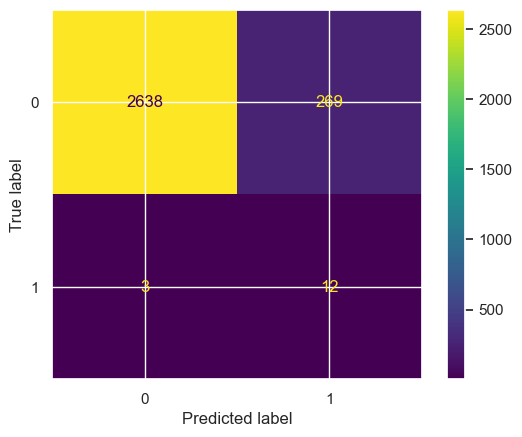

In [65]:
#plotting the confusion matrix
cm = confusion_matrix(pred_y, test_y, labels=RFC.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = RFC.classes_)
disp.plot()

In [66]:
#printing the accuracy score
print(accuracy_score(pred_y, test_y))

0.9069130732375086


<b>Precision</b> explains how many of the correctly predicted cases actually turned out to be positive. Precision is useful in the cases where False Positive is a higher concern than False Negatives.
but in this case we focus on predicting the churn. so, here precision is not taht much important.
we can use recall

In [67]:
print(precision_score(pred_y, test_y))

0.042704626334519574


<b>Recall</b> explains how many of the actual positive cases we were able to predict correctly with our model. Recall is a useful metric in cases where False Negative is of higher concern than False Positive. here we want to predict the churn customer that should not predict false.

In [68]:
print(recall_score(pred_y, test_y))

0.8


Model is performing good but it can be improved.

### Features responsible for churn

In [72]:
feature_importances = pd.DataFrame({
    'features': train_x.columns,
    'importance': RFC.feature_importances_
}).sort_values(by='importance', ascending=True).reset_index()

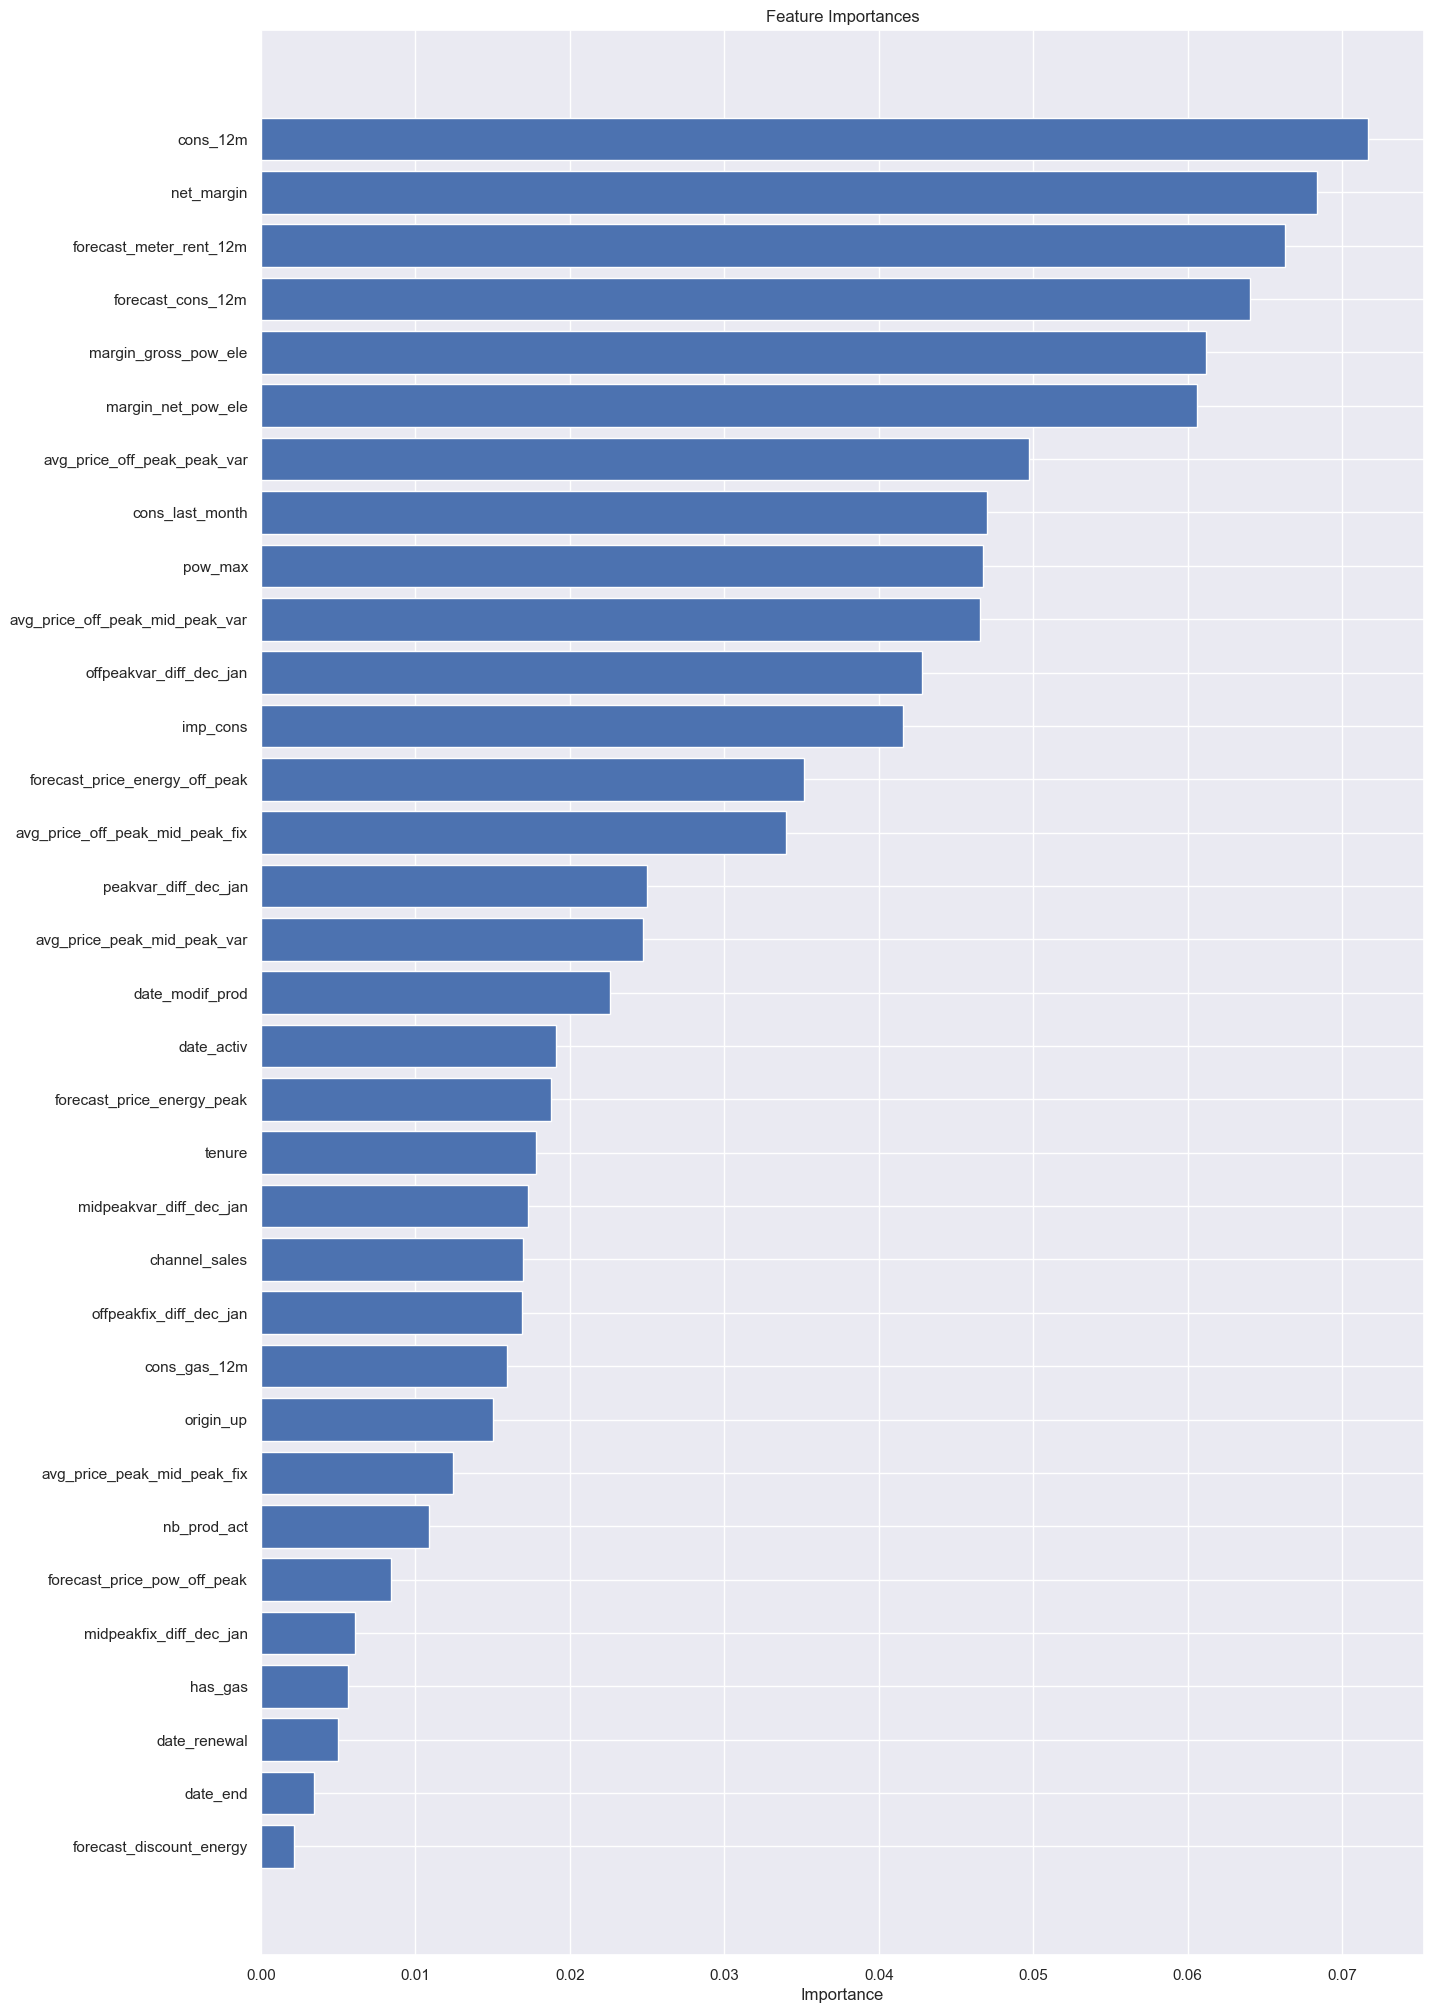

In [75]:
plt.figure(figsize=(15, 25))
plt.title('Feature Importances')
plt.barh(range(len(feature_importances)), feature_importances['importance'], color='b', align='center')
plt.yticks(range(len(feature_importances)), feature_importances['features'])
plt.xlabel('Importance')
plt.show()